In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
#from tqdm import tqdm, tqdm_notebook
from tqdm.notebook import tqdm

#from load_data_mongoloids import load_data_mongoloids
#from mongoloids_config import config

#from load_data_mongoloids import load_data_mongoloids_horvath_cpgs
#from mongoloids_cpg_horvath_config import config

#from load_data_mongoloids import load_data_mongoloids_hannum_cpgs
#from mongoloids_cpg_hannum_config import config

#from load_data_cancer import load_data_cancer
#from cancer_config import config

#from configurations.load_data_down_GSE63347 import load_data_down_GSE63347
#from configurations.config_down_GSE63347 import config

#from configurations.load_data_down_GSE63347 import load_data_down_GSE63347_cpg_horvath
#from configurations.config_down_GSE63347_cpg_horvath import config

from transform_data import *

from graphs_aux import *
import time
import matplotlib
import matplotlib.pyplot as plt
import textwrap
import scipy.stats as stats
import pandas as pd
from parenclitic import parenclitic

from infrastructure.configuration import param
import matplotlib.pylab as pylab
import seaborn as sns
sns.set_style('whitegrid', {'legend.frameon':True})
sns.set_palette(sns.color_palette("Set1", 12))
fontsize = 12
params = {
  'legend.fontsize': fontsize,
  'figure.figsize': (6.7, 5),
  'figure.dpi': 200,
  'axes.edgecolor':"0.3",
  'axes.labelsize': fontsize,
  'axes.titlesize':fontsize,
  'xtick.labelsize':fontsize,
  'ytick.labelsize':fontsize,
  'font.family':'serif'
}
pylab.rcParams.update(params)
pylab.rcParams.update(params)
plt.rc('axes', labelsize=fontsize) 
matplotlib.rcParams['text.usetex'] = True


#plt.style.use('ggplot')
%matplotlib inline

In [2]:
def fname(name):
    cid = np.nonzero(all_feature_names == name)
    return cid[0][0]

In [3]:
from configurations.load_data_random import load_data_random
from configurations.config_random_data import config

X, y, mask, genes_names = load_data_random()

Data loaded:  0.4190339999999999
float32 (14756, 29)
(29, 14756) 14756


In [3]:
#X, y, _, genes_names = load_data_mongoloids()
#X, y, _, genes_names = load_data_down_GSE63347()
#X, y, _, genes_names = load_data_cancer()
#X, y, _, cpgs_names = load_data_mongoloids_hannum_cpgs()
#X, y, _, cpgs_names = load_data_mongoloids_horvath_cpgs()

from configurations.current_config import get_config, get_data

#X, y, _, genes_names, age = get_data()
X, y, y_mask, all_feature_names = get_data()
config = get_config()

Data loaded:  40.91547609999998
float32 (422802, 87)
(87, 114674)
(87, 114674) 114674 (87,) (114674,)


In [4]:
groups = ["mongoloids_mask", "siblings_mask", "mothers_mask"]
group_names = ['DS', 'Siblings', 'Mothers']
group_masks = [0] * 3
for j, group_name in enumerate(groups):
    group_masks[j] = config.params[group_name].value
num_groups = len(groups)

[0.3117291  0.13553104 0.29276514 0.35418895 0.33638155 0.39056456
 0.12009948 0.21664062 0.2191663  0.34278503 0.29409575 0.3033581
 0.19430347 0.36816978 0.07992178 0.11764015 0.38265008 0.36843565
 0.34878156 0.34179702 0.3421944  0.32825565 0.27647036 0.41792333
 0.3312856  0.4016589  0.3024543  0.2834817  0.34018603]
[0.075051   0.17812106 0.20459184 0.16857366 0.13031018 0.15985359
 0.0815876  0.13923539 0.1613871  0.23671365 0.0521778  0.16704176
 0.19165832 0.14887147 0.095991   0.07322621 0.09241401 0.05947081
 0.22783917 0.0567879  0.23685189 0.19459961 0.22457907 0.17218429
 0.19219756 0.21553965 0.20555921 0.25053433 0.13017598]


Text(0, 0.5, 'PDF')

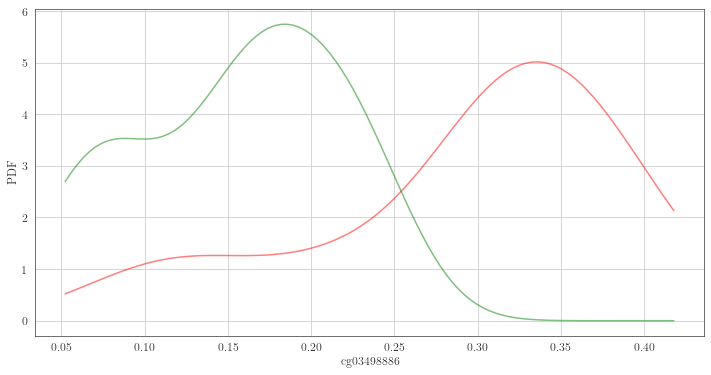

In [26]:
cpg_name = 'cg03498886'
fid = fname(cpg_name)
colors = ['r', 'g', 'b']
plt.figure(figsize = (12, 6))
for j, group_name in enumerate(groups[:2]):
    xu = X[group_masks[j], fid]
    print(xu)
    kde = stats.gaussian_kde(xu)
    x = np.linspace(X[:, fid].min(), X[:, fid].max(), 100)
    plt.plot(x, kde(x), color = colors[j], alpha = 0.5)
    
plt.xlabel(cpg_name, fontsize = fontsize)
plt.ylabel('PDF', fontsize = fontsize)

In [5]:
print (config.ofname(["graphs", "g"], ext = ".npz", include_set = config.params_sets["graph"]))

d:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_cpgs_114674\kde_mask_mongoloids_mask\algorithm_pdf\thr_type_best\division_rule_non_control\min_score_1\graphs\graph_id_sample_0.npz


In [6]:
from annotations.cpgs import cpgs_annotation
cpgs = cpgs_annotation(config.ifname('cpgs_annotations'))


In [7]:
import igraph
#import cairo
#def print_progress(message, percent):
#    print message, percent
#igraph.set_progress_handler(print_progress)

In [9]:
config.files['graphs'] = 'graphs_1'

# Load graphs

In [8]:
from graph_analysis.load_graphs import load_graphs
gs = load_graphs(config, all_feature_names)

# Strip graphs

In [9]:
from graph_analysis.strip_graphs import make_stripped_graphs
gs_stripped = make_stripped_graphs(config, cpgs, gs, all_feature_names)

Graph stripping:   0%|          | 0/87 [00:00<?, ?it/s]

Save stripped graphs:   0%|          | 0/87 [00:00<?, ?it/s]

In [10]:
print(sum(gs[0].degree()), sum(gs_stripped[0].degree()))

0 0


In [11]:
graph_path = config.ofname(["stripped_graphs", "g"], ext = ".tsv", include_set = config.params_sets["graph"])
print(graph_path)

d:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_cpgs_114674\kde_mask_mongoloids_mask\algorithm_pdf\thr_type_best\division_rule_non_control\min_score_1\stripped_graphs\graph_id_sample_86.tsv


In [11]:
id_group = 1
len(group_masks[id_group])

29

In [12]:
config.params['mongoloids_mask'].value

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])

# Diff graph

In [12]:
#groups = ["normal_mask", "down_mask"]
from graph_analysis.set_op_graphs import make_diff_graph
diff_graph_path = config.ofname("diff_graph", ext = ".npz", include_set = config.params_sets["diff_graph"])
make_diff_graph(config, gs, groups, group_masks, group_names, diff_graph_path)

#diff_graph_stripped_path = config.ofname("diff_graph_stripped", ext = ".npz", include_set = config.params_sets["diff_graph"])
#make_diff_graph(gs_stripped, diff_graph_stripped_path, all_feature_names)

d:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_cpgs_114674\kde_mask_mongoloids_mask\algorithm_pdf\thr_type_best\division_rule_non_control\min_score_1\diff_graph.npz


Graph merging:   0%|          | 0/87 [00:00<?, ?it/s]

In [13]:
def print_graph_info(g_and, g_or, g_diff):
    print('~Intersection')
    print('          Edges      Nodes')
    print('Down', "{:10d}".format(g_and[0].ecount()), "{:10d}".format(np.sum(np.array(g_and[0].degree()) > 0)))
    print('Sibs', "{:10d}".format(g_and[1].ecount()), "{:10d}".format(np.sum(np.array(g_and[1].degree()) > 0)))
    print('Moms', "{:10d}".format(g_and[2].ecount()), "{:10d}".format(np.sum(np.array(g_and[2].degree()) > 0)))
    print()
    print('~Union')
    print('          Edges      Nodes')
    print('Down', "{:10d}".format(g_or[0].ecount()), "{:10d}".format(np.sum(np.array(g_or[0].degree()) > 0)))
    print('Sibs', "{:10d}".format(g_or[1].ecount()), "{:10d}".format(np.sum(np.array(g_or[1].degree()) > 0)))
    print('Moms', "{:10d}".format(g_or[2].ecount()), "{:10d}".format(np.sum(np.array(g_or[2].degree()) > 0)))
    print()
    print('Diff', "{:10d}".format(g_diff.ecount()), "{:10d}".format(np.sum(np.array(g_diff.degree()) > 0)))


In [14]:
print(config.ofname("diff_graph", ext = ".png", include_set = config.params_sets["diff_graph"]))

d:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_cpgs_114674\kde_mask_mongoloids_mask\algorithm_pdf\thr_type_best\division_rule_non_control\min_score_1\diff_graph.png


# Export graphs

In [17]:
from graph_analysis.export_graph_info import export_best_cpg_pairs

#gc = g_or[0].copy()
#gc.vs["label"] = all_feature_names
#export_best_cpg_pairs(config, X, gc, case_name="ds", path=[])

In [18]:
config.params['kde_mask'].value

'mongoloids_mask'

In [15]:
def get_4network(config):
    group_id = {'ds': 0, 'dss': 1, 'dsm': 2}
    
    four_networks = {
        "mongoloids_mask": 'dsm-union',
        'healthy_mask': 'ds-union',
        
        'siblings_mask': 'ds-union',
        'mothers_mask': 'ds-union',
        'nonhealthy_mask': 'dsm-union',
        'age_mask': 'dsm-union',
    }
    
    kde_mask = config.params['kde_mask'].value
    net_name = four_networks[kde_mask]
    net_id = group_id[net_name.split('-')[0]]
    return net_id

In [16]:
from graph_analysis.set_op_graphs import load_diff_graphs
print(diff_graph_path)
g_diff, g_or, g_and = load_diff_graphs(diff_graph_path)

d:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_cpgs_114674\kde_mask_mongoloids_mask\algorithm_pdf\thr_type_best\division_rule_non_control\min_score_1\diff_graph.npz
0 0 0 0
114674 0


In [17]:
from graph_analysis.sieve_graphs import sieve_graphs
gss = sieve_graphs(config, gs, g_or, all_feature_names, get_4network)

Sieve:   0%|          | 0/87 [00:00<?, ?it/s]

# Export all

In [18]:
#g_diff, g_or, g_and = load_diff_graphs(diff_graph_path)
#gss = sieve_graphs(config, gs, g_or, all_feature_names)

from graph_analysis.export_graph_info import export_all
'''
g_diff, g_or, g_and = None, None, None
gss = None
export_all(config, gs, gss, g_diff, g_and, g_or, X, group_masks, group_names, all_feature_names, \
           [["final_graphs"]], is_plot_graph = False, is_plot_groups = False, is_plot_subjects = True)
'''

'''
g_diff, g_or, g_and = load_diff_graphs(diff_graph_stripped_path)
gss_stripped = sieve_graphs(config, gs_stripped, g_or, all_feature_names)
export_all(gs_stripped, gss_stripped, g_diff, g_and, g_or, all_feature_names, [["final_stripped_graphs"]], is_plot_graph = False)
'''

'\ng_diff, g_or, g_and = load_diff_graphs(diff_graph_stripped_path)\ngss_stripped = sieve_graphs(config, gs_stripped, g_or, all_feature_names)\nexport_all(gs_stripped, gss_stripped, g_diff, g_and, g_or, all_feature_names, [["final_stripped_graphs"]], is_plot_graph = False)\n'

# Annotate CpG sites from network

In [47]:
config.params['kde_mask'].value = 'siblings_mask'
ds_intersection_graph_path = config.ofname("ds_union_graph_vertices", ext = ".tsv", include_set = config.params_sets["diff_graph"] - {'LOO'})
ds_intersection_graph = pd.read_csv(ds_intersection_graph_path, sep = '\t', index_col=0)
ds_parenclitic_cpgs = ds_intersection_graph['genes'].values

In [83]:
df_cpg_annotation = cpgs.get_sub_frame({'cpgs_in': ds_parenclitic_cpgs})
df_cpg_annotation.to_excel('tmp.xlsx')

In [88]:
df_cpg_annotation_indexed = df_cpg_annotation.set_index('ID_REF')
print(df_cpg_annotation_indexed)

           CHR        MAPINFO Probe_SNPs Probe_SNPs_10 UCSC_REFGENE_NAME  \
ID_REF                                                                     
cg00001349   1  [166958439.0]      [nan]         [nan]              MAEL   
cg00007326  19   [13366046.0]      [nan]    rs76015014           CACNA1A   
cg00015024  10   [97803045.0]      [nan]         [nan]              CCNJ   
cg00024382  17   [34058623.0]      [nan]         [nan]           RASL10B   
cg00031165   7   [87258360.0]  rs2157928         [nan]  {ABCB1, RUNDC3B}   
...         ..            ...        ...           ...               ...   
cg27649089   8   [22436424.0]      [nan]         [nan]            PDLIM2   
cg27649194  12    [1974168.0]      [nan]         [nan]          CACNA2D4   
cg27652350  15  [101420989.0]      [nan]         [nan]           ALDH1A3   
cg27652464  22   [48886775.0]      [nan]         [nan]           FAM19A5   
cg27666046  17   [80279077.0]      [nan]         [nan]            SECTM1   

           

In [89]:
ds_intersection_graph_path = config.ofname("ds_union_graph", ext = ".tsv", include_set = config.params_sets["diff_graph"] - {'LOO'})
ds_intersection_graph = pd.read_csv(ds_intersection_graph_path, sep = '\t', index_col=0)
ds_parenclitic_cpgs_1 = ds_intersection_graph['gene_1'].values
ds_parenclitic_cpgs_2 = ds_intersection_graph['gene_2'].values
ds_subset_no_21 = [(x, y) for x, y in zip(ds_parenclitic_cpgs_1, ds_parenclitic_cpgs_2) if df_cpg_annotation_indexed.loc[x, "CHR"] != "21" and df_cpg_annotation_indexed.loc[y, "CHR"] != "21"]

In [98]:
len(ds_parenclitic_cpgs_1), len(ds_subset_no_21)

(6325, 5749)

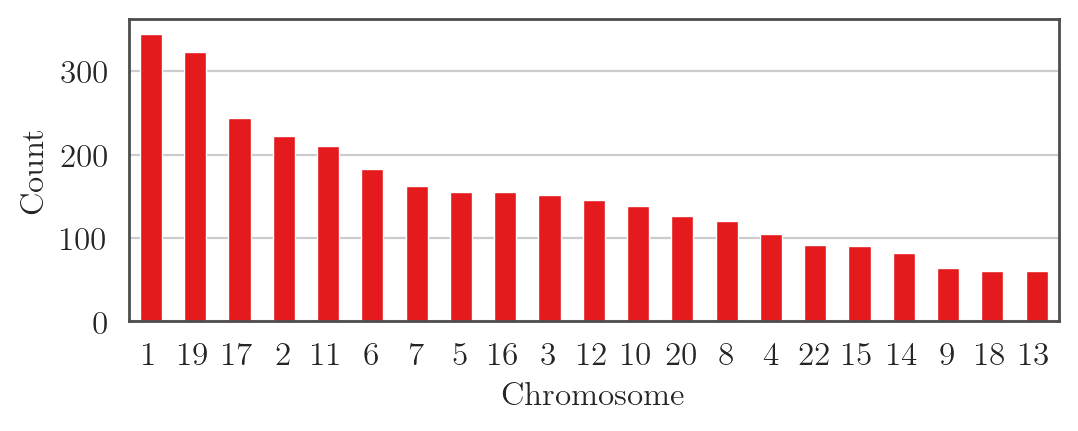

In [97]:
df_cpg_annotation_no_21 = cpgs.get_sub_frame({'cpgs_in': np.array(ds_subset_no_21).flatten().tolist()})

plt.figure(figsize=(6, 2), dpi=200)
df_cpg_annotation_no_21['CHR'].value_counts().plot(kind='bar')
plt.xlabel('Chromosome')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.grid(axis='x')


In [70]:
geneparts_grouped = cpgs.aggregate('genepart', 'cpgs', criterions={'cpgs_in': ds_parenclitic_cpgs})
df_geneparts = pd.Series({key: len(value) for key, value in geneparts_grouped.items()})

In [84]:
df_cpg_annotation

,ID_REF,CHR,MAPINFO,Probe_SNPs,Probe_SNPs_10,UCSC_REFGENE_NAME,UCSC_REFGENE_ACCESSION,UCSC_REFGENE_GROUP,UCSC_CPG_ISLANDS_NAME,RELATION_TO_UCSC_CPG_ISLAND,Class,BOP,n.CpG,CROSS_R
26,cg00001349,1,[166958439.0],[nan],[nan],MAEL,NM_032858,TSS200,chr1:166958220-166958683,Island,ClassA,chr1:166958220-166958683*Island,[11.0],[0]
173,cg00007326,19,[13366046.0],[nan],rs76015014,CACNA1A,"{NM_001127221, NM_001127222}",Body,chr19:13365922-13366158,Island,ClassA,chr19:13365922-13366158*Island,[4.0],[0]
368,cg00015024,10,[97803045.0],[nan],[nan],CCNJ,"{NM_019084, NM_001134376, NM_001134375}",TSS200,chr10:97802871-97804262,Island,ClassA,chr10:97802871-97804262*Island,[13.0],[0]
590,cg00024382,17,[34058623.0],[nan],[nan],RASL10B,NM_033315,TSS200,chr17:34058549-34058778,Island,ClassA,chr17:34058549-34058778*Island,[4.0],[0]
773,cg00031165,7,[87258360.0],rs2157928,[nan],"{ABCB1, RUNDC3B}","{NM_001134406, NM_000927, NM_138290, NM_001134...","{5'UTR, Body}",chr7:87256958-87258444,Island,ClassA,chr7:87256958-87258444*Island,[11.0],[0]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482122,cg27649089,8,[22436424.0],[nan],[nan],PDLIM2,NM_021630,TSS1500,chr8:22436295-22437076,Island,ClassA,chr8:22436295-22437076*Island,[6.0],[0]
482124,cg27649194,12,[1974168.0],[nan],[nan],CACNA2D4,NM_172364,Body,chr12:1973739-1974958,Island,ClassA,chr12:1973739-1974958*Island,[5.0],[0]
482172,cg27652350,15,[101420989.0],[nan],[nan],ALDH1A3,NM_000693,Body,chr15:101419261-101421133,Island,ClassA,chr15:101419261-101421133*Island,[15.0],[0]
482174,cg27652464,22,[48886775.0],[nan],[nan],FAM19A5,NM_001082967,Body,chr22:48884884-48887043,Island,ClassA,chr22:48884884-48887043*Island,[9.0],[0]


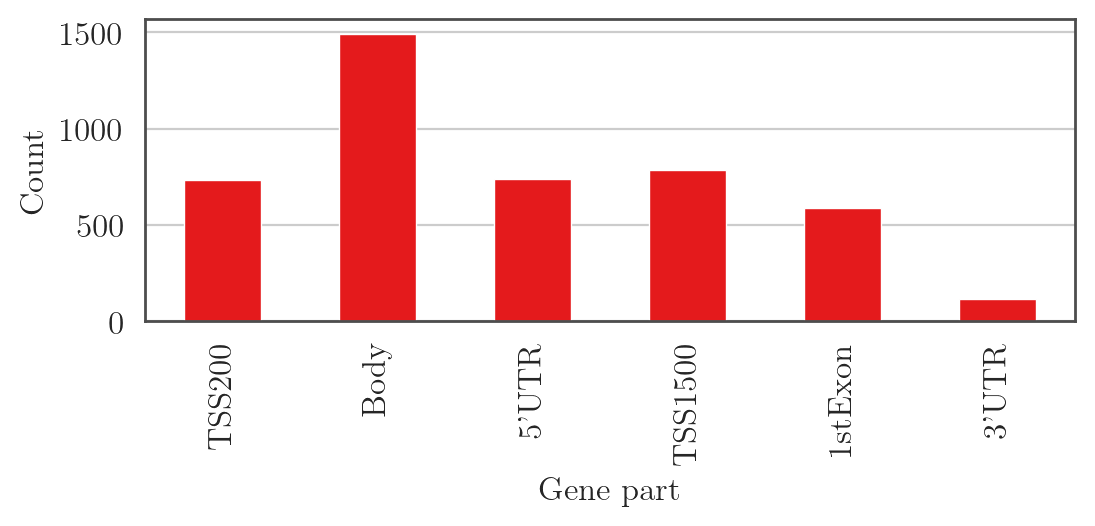

In [71]:
plt.figure(figsize=(6, 2), dpi=200)
df_geneparts.plot(kind='bar')
plt.xlabel('Gene part')
#plt.xticks(rotation=0)
plt.ylabel('Count')
plt.grid(axis='x')


In [80]:
genes_grouped = cpgs.aggregate('gene', 'cpgs', criterions={'cpgs_in': ds_parenclitic_cpgs})
df_genes = pd.Series({key: len(value) for key, value in genes_grouped.items()})
df_genes = df_genes.sort_values(ascending=False)
df_genes[:5]

NNAT     11
BLCAP    11
KCNJ6     9
GNAS      8
PRKCZ     7
dtype: int64

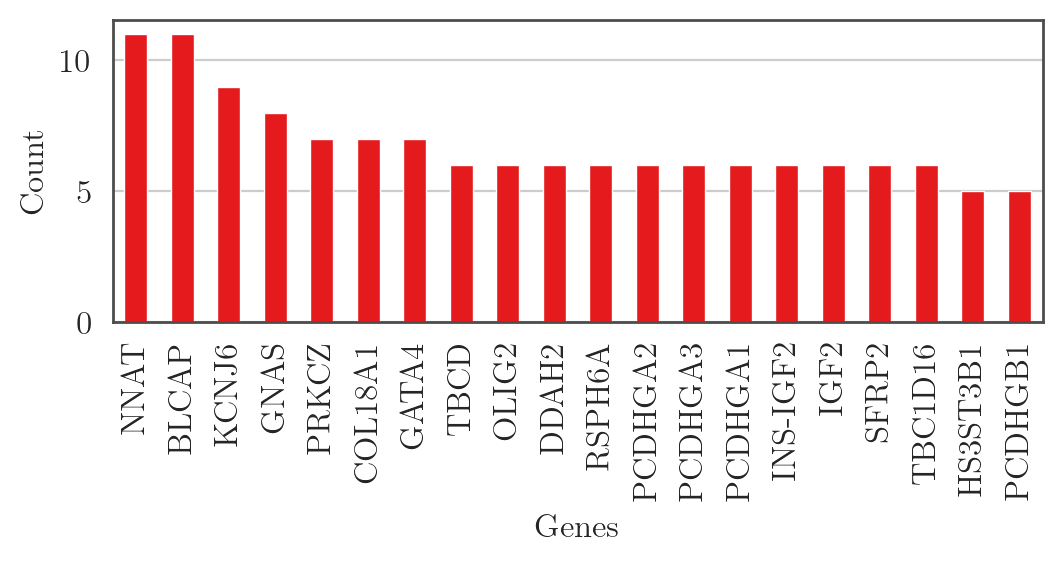

In [82]:
plt.figure(figsize=(6, 2), dpi=200)
df_genes[:20].plot(kind='bar')
plt.xlabel('Genes')
#plt.xticks(rotation=0)
plt.ylabel('Count')
plt.grid(axis='x')

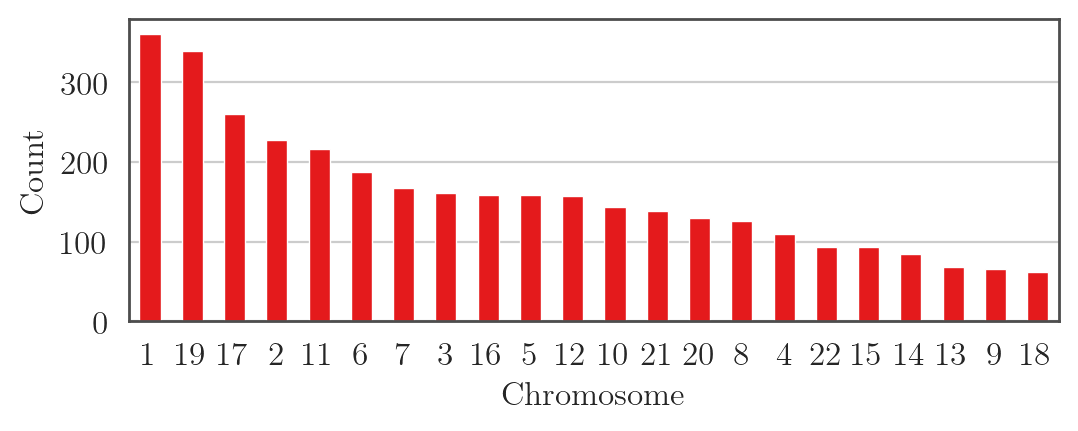

In [57]:
plt.figure(figsize=(6, 2), dpi=200)
df_cpg_annotation['CHR'].value_counts().plot(kind='bar')
plt.xlabel('Chromosome')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.grid(axis='x')


# LOO export all

In [23]:
for id_leave in tqdm(config.params["LOO"]):
    gs = load_graphs(config, all_feature_names)
    gs_stripped = make_stripped_graphs(config, cpgs, gs, all_feature_names)
    
    diff_graph_path = config.ofname("diff_graph", ext = ".npz", include_set = config.params_sets["diff_graph"])
    make_diff_graph(config, gs, groups, group_masks, group_names, diff_graph_path)

    diff_graph_stripped_path = config.ofname("diff_graph_stripped", ext = ".npz", include_set = config.params_sets["diff_graph"])
    make_diff_graph(config, gs_stripped, groups, group_masks, group_names, diff_graph_stripped_path)
    
    g_diff, g_or, g_and = load_diff_graphs(diff_graph_path)
    gss = sieve_graphs(config, gs, g_or, all_feature_names, get_4network)
    export_all(config, gs, gss, g_diff, g_and, g_or, X, group_masks, group_names, all_feature_names, \
               [["final_graphs"]], is_plot_graph = False, is_plot_groups = False, is_plot_subjects = True)

    g_diff, g_or, g_and = load_diff_graphs(diff_graph_stripped_path)
    gss_stripped = sieve_graphs(config, gs_stripped, g_or, all_feature_names, get_4network)
    export_all(config, gs_stripped, gss_stripped, g_diff, g_and, g_or,  X, group_masks, group_names, \
               all_feature_names, [["final_stripped_graphs"]], is_plot_graph = False, is_plot_groups = False, is_plot_subjects = True)
    

  0%|          | 0/29 [00:00<?, ?it/s]

Graph stripping:   0%|          | 0/87 [00:00<?, ?it/s]

Save stripped graphs:   0%|          | 0/87 [00:00<?, ?it/s]

d:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_cpgs_114674\kde_mask_mongoloids_mask\algorithm_pdf\thr_type_best\division_rule_non_control\diff_graph_LOO_0.npz


Graph merging:   0%|          | 0/87 [00:00<?, ?it/s]

d:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_cpgs_114674\kde_mask_mongoloids_mask\algorithm_pdf\thr_type_best\division_rule_non_control\diff_graph_stripped_LOO_0.npz


Graph merging:   0%|          | 0/87 [00:00<?, ?it/s]

4064 5056 0 108
114674 0


Sieve:   0%|          | 0/87 [00:00<?, ?it/s]

Graphs export:   0%|          | 0/87 [00:00<?, ?it/s]

3728 4634 0 93
114674 0


Sieve:   0%|          | 0/87 [00:00<?, ?it/s]

Graphs export:   0%|          | 0/87 [00:00<?, ?it/s]

Graph stripping:   0%|          | 0/87 [00:00<?, ?it/s]

Save stripped graphs:   0%|          | 0/87 [00:00<?, ?it/s]

d:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_cpgs_114674\kde_mask_mongoloids_mask\algorithm_pdf\thr_type_best\division_rule_non_control\diff_graph_LOO_1.npz


Graph merging:   0%|          | 0/87 [00:00<?, ?it/s]

d:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_cpgs_114674\kde_mask_mongoloids_mask\algorithm_pdf\thr_type_best\division_rule_non_control\diff_graph_stripped_LOO_1.npz


Graph merging:   0%|          | 0/87 [00:00<?, ?it/s]

3558 4777 0 142
114674 0


Sieve:   0%|          | 0/87 [00:00<?, ?it/s]

Graphs export:   0%|          | 0/87 [00:00<?, ?it/s]

2979 4019 0 126
114674 0


Sieve:   0%|          | 0/87 [00:00<?, ?it/s]

Graphs export:   0%|          | 0/87 [00:00<?, ?it/s]

Graph stripping:   0%|          | 0/87 [00:00<?, ?it/s]

Save stripped graphs:   0%|          | 0/87 [00:00<?, ?it/s]

d:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_cpgs_114674\kde_mask_mongoloids_mask\algorithm_pdf\thr_type_best\division_rule_non_control\diff_graph_LOO_2.npz


Graph merging:   0%|          | 0/87 [00:00<?, ?it/s]

d:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_cpgs_114674\kde_mask_mongoloids_mask\algorithm_pdf\thr_type_best\division_rule_non_control\diff_graph_stripped_LOO_2.npz


Graph merging:   0%|          | 0/87 [00:00<?, ?it/s]

3837 4795 0 139
114674 0


Sieve:   0%|          | 0/87 [00:00<?, ?it/s]

Graphs export:   0%|          | 0/87 [00:00<?, ?it/s]

3455 4290 0 120
114674 0


Sieve:   0%|          | 0/87 [00:00<?, ?it/s]

Graphs export:   0%|          | 0/87 [00:00<?, ?it/s]

Graph stripping:   0%|          | 0/87 [00:00<?, ?it/s]

Save stripped graphs:   0%|          | 0/87 [00:00<?, ?it/s]

d:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_cpgs_114674\kde_mask_mongoloids_mask\algorithm_pdf\thr_type_best\division_rule_non_control\diff_graph_LOO_3.npz


Graph merging:   0%|          | 0/87 [00:00<?, ?it/s]

d:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_cpgs_114674\kde_mask_mongoloids_mask\algorithm_pdf\thr_type_best\division_rule_non_control\diff_graph_stripped_LOO_3.npz


Graph merging:   0%|          | 0/87 [00:00<?, ?it/s]

3327 4677 0 120
114674 0


Sieve:   0%|          | 0/87 [00:00<?, ?it/s]

Graphs export:   0%|          | 0/87 [00:00<?, ?it/s]

2775 3892 0 96
114674 0


Sieve:   0%|          | 0/87 [00:00<?, ?it/s]

Graphs export:   0%|          | 0/87 [00:00<?, ?it/s]

Graph stripping:   0%|          | 0/87 [00:00<?, ?it/s]

Save stripped graphs:   0%|          | 0/87 [00:00<?, ?it/s]

d:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_cpgs_114674\kde_mask_mongoloids_mask\algorithm_pdf\thr_type_best\division_rule_non_control\diff_graph_LOO_4.npz


Graph merging:   0%|          | 0/87 [00:00<?, ?it/s]

d:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_cpgs_114674\kde_mask_mongoloids_mask\algorithm_pdf\thr_type_best\division_rule_non_control\diff_graph_stripped_LOO_4.npz


Graph merging:   0%|          | 0/87 [00:00<?, ?it/s]

3134 4120 0 120
114674 0


Sieve:   0%|          | 0/87 [00:00<?, ?it/s]

Graphs export:   0%|          | 0/87 [00:00<?, ?it/s]

2857 3719 0 110
114674 0


Sieve:   0%|          | 0/87 [00:00<?, ?it/s]

Graphs export:   0%|          | 0/87 [00:00<?, ?it/s]

Graph stripping:   0%|          | 0/87 [00:00<?, ?it/s]

Save stripped graphs:   0%|          | 0/87 [00:00<?, ?it/s]

d:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_cpgs_114674\kde_mask_mongoloids_mask\algorithm_pdf\thr_type_best\division_rule_non_control\diff_graph_LOO_5.npz


Graph merging:   0%|          | 0/87 [00:00<?, ?it/s]

d:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_cpgs_114674\kde_mask_mongoloids_mask\algorithm_pdf\thr_type_best\division_rule_non_control\diff_graph_stripped_LOO_5.npz


Graph merging:   0%|          | 0/87 [00:00<?, ?it/s]

3571 5166 0 103
114674 0


Sieve:   0%|          | 0/87 [00:00<?, ?it/s]

Graphs export:   0%|          | 0/87 [00:00<?, ?it/s]

3095 4393 0 84
114674 0


Sieve:   0%|          | 0/87 [00:00<?, ?it/s]

Graphs export:   0%|          | 0/87 [00:00<?, ?it/s]

Graph stripping:   0%|          | 0/87 [00:00<?, ?it/s]

Save stripped graphs:   0%|          | 0/87 [00:00<?, ?it/s]

d:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_cpgs_114674\kde_mask_mongoloids_mask\algorithm_pdf\thr_type_best\division_rule_non_control\diff_graph_LOO_6.npz


Graph merging:   0%|          | 0/87 [00:00<?, ?it/s]

d:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_cpgs_114674\kde_mask_mongoloids_mask\algorithm_pdf\thr_type_best\division_rule_non_control\diff_graph_stripped_LOO_6.npz


Graph merging:   0%|          | 0/87 [00:00<?, ?it/s]

2783 3770 0 91
114674 0


Sieve:   0%|          | 0/87 [00:00<?, ?it/s]

Graphs export:   0%|          | 0/87 [00:00<?, ?it/s]

2530 3399 0 69
114674 0


Sieve:   0%|          | 0/87 [00:00<?, ?it/s]

Graphs export:   0%|          | 0/87 [00:00<?, ?it/s]

Graph stripping:   0%|          | 0/87 [00:00<?, ?it/s]

Save stripped graphs:   0%|          | 0/87 [00:00<?, ?it/s]

d:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_cpgs_114674\kde_mask_mongoloids_mask\algorithm_pdf\thr_type_best\division_rule_non_control\diff_graph_LOO_7.npz


Graph merging:   0%|          | 0/87 [00:00<?, ?it/s]

d:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_cpgs_114674\kde_mask_mongoloids_mask\algorithm_pdf\thr_type_best\division_rule_non_control\diff_graph_stripped_LOO_7.npz


Graph merging:   0%|          | 0/87 [00:00<?, ?it/s]

3348 4824 0 147
114674 0


Sieve:   0%|          | 0/87 [00:00<?, ?it/s]

Graphs export:   0%|          | 0/87 [00:00<?, ?it/s]

3094 4411 0 136
114674 0


Sieve:   0%|          | 0/87 [00:00<?, ?it/s]

Graphs export:   0%|          | 0/87 [00:00<?, ?it/s]

Graph stripping:   0%|          | 0/87 [00:00<?, ?it/s]

Save stripped graphs:   0%|          | 0/87 [00:00<?, ?it/s]

d:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_cpgs_114674\kde_mask_mongoloids_mask\algorithm_pdf\thr_type_best\division_rule_non_control\diff_graph_LOO_8.npz


Graph merging:   0%|          | 0/87 [00:00<?, ?it/s]

d:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_cpgs_114674\kde_mask_mongoloids_mask\algorithm_pdf\thr_type_best\division_rule_non_control\diff_graph_stripped_LOO_8.npz


Graph merging:   0%|          | 0/87 [00:00<?, ?it/s]

3098 4440 0 101
114674 0


Sieve:   0%|          | 0/87 [00:00<?, ?it/s]

Graphs export:   0%|          | 0/87 [00:00<?, ?it/s]

2659 3771 0 81
114674 0


Sieve:   0%|          | 0/87 [00:00<?, ?it/s]

Graphs export:   0%|          | 0/87 [00:00<?, ?it/s]

Graph stripping:   0%|          | 0/87 [00:00<?, ?it/s]

Save stripped graphs:   0%|          | 0/87 [00:00<?, ?it/s]

d:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_cpgs_114674\kde_mask_mongoloids_mask\algorithm_pdf\thr_type_best\division_rule_non_control\diff_graph_LOO_9.npz


Graph merging:   0%|          | 0/87 [00:00<?, ?it/s]

d:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_cpgs_114674\kde_mask_mongoloids_mask\algorithm_pdf\thr_type_best\division_rule_non_control\diff_graph_stripped_LOO_9.npz


Graph merging:   0%|          | 0/87 [00:00<?, ?it/s]

3799 5528 0 124
114674 0


Sieve:   0%|          | 0/87 [00:00<?, ?it/s]

Graphs export:   0%|          | 0/87 [00:00<?, ?it/s]

3547 5102 0 115
114674 0


Sieve:   0%|          | 0/87 [00:00<?, ?it/s]

Graphs export:   0%|          | 0/87 [00:00<?, ?it/s]

Graph stripping:   0%|          | 0/87 [00:00<?, ?it/s]

Save stripped graphs:   0%|          | 0/87 [00:00<?, ?it/s]

d:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_cpgs_114674\kde_mask_mongoloids_mask\algorithm_pdf\thr_type_best\division_rule_non_control\diff_graph_LOO_10.npz


Graph merging:   0%|          | 0/87 [00:00<?, ?it/s]

d:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_cpgs_114674\kde_mask_mongoloids_mask\algorithm_pdf\thr_type_best\division_rule_non_control\diff_graph_stripped_LOO_10.npz


Graph merging:   0%|          | 0/87 [00:00<?, ?it/s]

3190 4475 0 112
114674 0


Sieve:   0%|          | 0/87 [00:00<?, ?it/s]

Graphs export:   0%|          | 0/87 [00:00<?, ?it/s]

2700 3735 0 83
114674 0


Sieve:   0%|          | 0/87 [00:00<?, ?it/s]

Graphs export:   0%|          | 0/87 [00:00<?, ?it/s]

Graph stripping:   0%|          | 0/87 [00:00<?, ?it/s]

Save stripped graphs:   0%|          | 0/87 [00:00<?, ?it/s]

d:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_cpgs_114674\kde_mask_mongoloids_mask\algorithm_pdf\thr_type_best\division_rule_non_control\diff_graph_LOO_11.npz


Graph merging:   0%|          | 0/87 [00:00<?, ?it/s]

d:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_cpgs_114674\kde_mask_mongoloids_mask\algorithm_pdf\thr_type_best\division_rule_non_control\diff_graph_stripped_LOO_11.npz


Graph merging:   0%|          | 0/87 [00:00<?, ?it/s]

3549 4905 0 141
114674 0


Sieve:   0%|          | 0/87 [00:00<?, ?it/s]

Graphs export:   0%|          | 0/87 [00:00<?, ?it/s]

3144 4380 0 115
114674 0


Sieve:   0%|          | 0/87 [00:00<?, ?it/s]

Graphs export:   0%|          | 0/87 [00:00<?, ?it/s]

Graph stripping:   0%|          | 0/87 [00:00<?, ?it/s]

Save stripped graphs:   0%|          | 0/87 [00:00<?, ?it/s]

d:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_cpgs_114674\kde_mask_mongoloids_mask\algorithm_pdf\thr_type_best\division_rule_non_control\diff_graph_LOO_12.npz


Graph merging:   0%|          | 0/87 [00:00<?, ?it/s]

d:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_cpgs_114674\kde_mask_mongoloids_mask\algorithm_pdf\thr_type_best\division_rule_non_control\diff_graph_stripped_LOO_12.npz


Graph merging:   0%|          | 0/87 [00:00<?, ?it/s]

3424 4439 0 78
114674 0


Sieve:   0%|          | 0/87 [00:00<?, ?it/s]

Graphs export:   0%|          | 0/87 [00:00<?, ?it/s]

3256 4224 0 75
114674 0


Sieve:   0%|          | 0/87 [00:00<?, ?it/s]

Graphs export:   0%|          | 0/87 [00:00<?, ?it/s]

Graph stripping:   0%|          | 0/87 [00:00<?, ?it/s]

Save stripped graphs:   0%|          | 0/87 [00:00<?, ?it/s]

d:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_cpgs_114674\kde_mask_mongoloids_mask\algorithm_pdf\thr_type_best\division_rule_non_control\diff_graph_LOO_13.npz


Graph merging:   0%|          | 0/87 [00:00<?, ?it/s]

d:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_cpgs_114674\kde_mask_mongoloids_mask\algorithm_pdf\thr_type_best\division_rule_non_control\diff_graph_stripped_LOO_13.npz


Graph merging:   0%|          | 0/87 [00:00<?, ?it/s]

4243 5917 0 120
114674 0


Sieve:   0%|          | 0/87 [00:00<?, ?it/s]

Graphs export:   0%|          | 0/87 [00:00<?, ?it/s]

3621 5034 0 93
114674 0


Sieve:   0%|          | 0/87 [00:00<?, ?it/s]

Graphs export:   0%|          | 0/87 [00:00<?, ?it/s]

Graph stripping:   0%|          | 0/87 [00:00<?, ?it/s]

Save stripped graphs:   0%|          | 0/87 [00:00<?, ?it/s]

d:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_cpgs_114674\kde_mask_mongoloids_mask\algorithm_pdf\thr_type_best\division_rule_non_control\diff_graph_LOO_14.npz


Graph merging:   0%|          | 0/87 [00:00<?, ?it/s]

d:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_cpgs_114674\kde_mask_mongoloids_mask\algorithm_pdf\thr_type_best\division_rule_non_control\diff_graph_stripped_LOO_14.npz


Graph merging:   0%|          | 0/87 [00:00<?, ?it/s]

3264 4815 0 92
114674 0


Sieve:   0%|          | 0/87 [00:00<?, ?it/s]

Graphs export:   0%|          | 0/87 [00:00<?, ?it/s]

2758 4110 0 74
114674 0


Sieve:   0%|          | 0/87 [00:00<?, ?it/s]

Graphs export:   0%|          | 0/87 [00:00<?, ?it/s]

Graph stripping:   0%|          | 0/87 [00:00<?, ?it/s]

Save stripped graphs:   0%|          | 0/87 [00:00<?, ?it/s]

d:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_cpgs_114674\kde_mask_mongoloids_mask\algorithm_pdf\thr_type_best\division_rule_non_control\diff_graph_LOO_15.npz


Graph merging:   0%|          | 0/87 [00:00<?, ?it/s]

d:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_cpgs_114674\kde_mask_mongoloids_mask\algorithm_pdf\thr_type_best\division_rule_non_control\diff_graph_stripped_LOO_15.npz


Graph merging:   0%|          | 0/87 [00:00<?, ?it/s]

2798 4252 0 100
114674 0


Sieve:   0%|          | 0/87 [00:00<?, ?it/s]

Graphs export:   0%|          | 0/87 [00:00<?, ?it/s]

2530 3819 0 76
114674 0


Sieve:   0%|          | 0/87 [00:00<?, ?it/s]

Graphs export:   0%|          | 0/87 [00:00<?, ?it/s]

Graph stripping:   0%|          | 0/87 [00:00<?, ?it/s]

Save stripped graphs:   0%|          | 0/87 [00:00<?, ?it/s]

d:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_cpgs_114674\kde_mask_mongoloids_mask\algorithm_pdf\thr_type_best\division_rule_non_control\diff_graph_LOO_16.npz


Graph merging:   0%|          | 0/87 [00:00<?, ?it/s]

d:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_cpgs_114674\kde_mask_mongoloids_mask\algorithm_pdf\thr_type_best\division_rule_non_control\diff_graph_stripped_LOO_16.npz


Graph merging:   0%|          | 0/87 [00:00<?, ?it/s]

3035 4492 0 83
114674 0


Sieve:   0%|          | 0/87 [00:00<?, ?it/s]

Graphs export:   0%|          | 0/87 [00:00<?, ?it/s]

2750 4063 0 76
114674 0


Sieve:   0%|          | 0/87 [00:00<?, ?it/s]

Graphs export:   0%|          | 0/87 [00:00<?, ?it/s]

Graph stripping:   0%|          | 0/87 [00:00<?, ?it/s]

Save stripped graphs:   0%|          | 0/87 [00:00<?, ?it/s]

d:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_cpgs_114674\kde_mask_mongoloids_mask\algorithm_pdf\thr_type_best\division_rule_non_control\diff_graph_LOO_17.npz


Graph merging:   0%|          | 0/87 [00:00<?, ?it/s]

d:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_cpgs_114674\kde_mask_mongoloids_mask\algorithm_pdf\thr_type_best\division_rule_non_control\diff_graph_stripped_LOO_17.npz


Graph merging:   0%|          | 0/87 [00:00<?, ?it/s]

3126 4848 0 99
114674 0


Sieve:   0%|          | 0/87 [00:00<?, ?it/s]

Graphs export:   0%|          | 0/87 [00:00<?, ?it/s]

2842 4391 0 81
114674 0


Sieve:   0%|          | 0/87 [00:00<?, ?it/s]

Graphs export:   0%|          | 0/87 [00:00<?, ?it/s]

Graph stripping:   0%|          | 0/87 [00:00<?, ?it/s]

Save stripped graphs:   0%|          | 0/87 [00:00<?, ?it/s]

d:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_cpgs_114674\kde_mask_mongoloids_mask\algorithm_pdf\thr_type_best\division_rule_non_control\diff_graph_LOO_18.npz


Graph merging:   0%|          | 0/87 [00:00<?, ?it/s]

d:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_cpgs_114674\kde_mask_mongoloids_mask\algorithm_pdf\thr_type_best\division_rule_non_control\diff_graph_stripped_LOO_18.npz


Graph merging:   0%|          | 0/87 [00:00<?, ?it/s]

3528 4936 0 135
114674 0


Sieve:   0%|          | 0/87 [00:00<?, ?it/s]

Graphs export:   0%|          | 0/87 [00:00<?, ?it/s]

3237 4502 0 111
114674 0


Sieve:   0%|          | 0/87 [00:00<?, ?it/s]

Graphs export:   0%|          | 0/87 [00:00<?, ?it/s]

Graph stripping:   0%|          | 0/87 [00:00<?, ?it/s]

Save stripped graphs:   0%|          | 0/87 [00:00<?, ?it/s]

d:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_cpgs_114674\kde_mask_mongoloids_mask\algorithm_pdf\thr_type_best\division_rule_non_control\diff_graph_LOO_19.npz


Graph merging:   0%|          | 0/87 [00:00<?, ?it/s]

d:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_cpgs_114674\kde_mask_mongoloids_mask\algorithm_pdf\thr_type_best\division_rule_non_control\diff_graph_stripped_LOO_19.npz


Graph merging:   0%|          | 0/87 [00:00<?, ?it/s]

3081 4422 0 93
114674 0


Sieve:   0%|          | 0/87 [00:00<?, ?it/s]

Graphs export:   0%|          | 0/87 [00:00<?, ?it/s]

2698 3840 0 76
114674 0


Sieve:   0%|          | 0/87 [00:00<?, ?it/s]

Graphs export:   0%|          | 0/87 [00:00<?, ?it/s]

Graph stripping:   0%|          | 0/87 [00:00<?, ?it/s]

Save stripped graphs:   0%|          | 0/87 [00:00<?, ?it/s]

d:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_cpgs_114674\kde_mask_mongoloids_mask\algorithm_pdf\thr_type_best\division_rule_non_control\diff_graph_LOO_20.npz


Graph merging:   0%|          | 0/87 [00:00<?, ?it/s]

d:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_cpgs_114674\kde_mask_mongoloids_mask\algorithm_pdf\thr_type_best\division_rule_non_control\diff_graph_stripped_LOO_20.npz


Graph merging:   0%|          | 0/87 [00:00<?, ?it/s]

2944 3996 0 94
114674 0


Sieve:   0%|          | 0/87 [00:00<?, ?it/s]

Graphs export:   0%|          | 0/87 [00:00<?, ?it/s]

2413 3303 0 72
114674 0


Sieve:   0%|          | 0/87 [00:00<?, ?it/s]

Graphs export:   0%|          | 0/87 [00:00<?, ?it/s]

Graph stripping:   0%|          | 0/87 [00:00<?, ?it/s]

Save stripped graphs:   0%|          | 0/87 [00:00<?, ?it/s]

d:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_cpgs_114674\kde_mask_mongoloids_mask\algorithm_pdf\thr_type_best\division_rule_non_control\diff_graph_LOO_21.npz


Graph merging:   0%|          | 0/87 [00:00<?, ?it/s]

d:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_cpgs_114674\kde_mask_mongoloids_mask\algorithm_pdf\thr_type_best\division_rule_non_control\diff_graph_stripped_LOO_21.npz


Graph merging:   0%|          | 0/87 [00:00<?, ?it/s]

3267 4808 0 89
114674 0


Sieve:   0%|          | 0/87 [00:00<?, ?it/s]

Graphs export:   0%|          | 0/87 [00:00<?, ?it/s]

2894 4214 0 71
114674 0


Sieve:   0%|          | 0/87 [00:00<?, ?it/s]

Graphs export:   0%|          | 0/87 [00:00<?, ?it/s]

Graph stripping:   0%|          | 0/87 [00:00<?, ?it/s]

Save stripped graphs:   0%|          | 0/87 [00:00<?, ?it/s]

d:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_cpgs_114674\kde_mask_mongoloids_mask\algorithm_pdf\thr_type_best\division_rule_non_control\diff_graph_LOO_22.npz


Graph merging:   0%|          | 0/87 [00:00<?, ?it/s]

d:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_cpgs_114674\kde_mask_mongoloids_mask\algorithm_pdf\thr_type_best\division_rule_non_control\diff_graph_stripped_LOO_22.npz


Graph merging:   0%|          | 0/87 [00:00<?, ?it/s]

3622 5092 0 114
114674 0


Sieve:   0%|          | 0/87 [00:00<?, ?it/s]

Graphs export:   0%|          | 0/87 [00:00<?, ?it/s]

3241 4566 0 101
114674 0


Sieve:   0%|          | 0/87 [00:00<?, ?it/s]

Graphs export:   0%|          | 0/87 [00:00<?, ?it/s]

Graph stripping:   0%|          | 0/87 [00:00<?, ?it/s]

Save stripped graphs:   0%|          | 0/87 [00:00<?, ?it/s]

d:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_cpgs_114674\kde_mask_mongoloids_mask\algorithm_pdf\thr_type_best\division_rule_non_control\diff_graph_LOO_23.npz


Graph merging:   0%|          | 0/87 [00:00<?, ?it/s]

d:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_cpgs_114674\kde_mask_mongoloids_mask\algorithm_pdf\thr_type_best\division_rule_non_control\diff_graph_stripped_LOO_23.npz


Graph merging:   0%|          | 0/87 [00:00<?, ?it/s]

3719 5523 0 95
114674 0


Sieve:   0%|          | 0/87 [00:00<?, ?it/s]

Graphs export:   0%|          | 0/87 [00:00<?, ?it/s]

3332 4901 0 80
114674 0


Sieve:   0%|          | 0/87 [00:00<?, ?it/s]

Graphs export:   0%|          | 0/87 [00:00<?, ?it/s]

Graph stripping:   0%|          | 0/87 [00:00<?, ?it/s]

Save stripped graphs:   0%|          | 0/87 [00:00<?, ?it/s]

d:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_cpgs_114674\kde_mask_mongoloids_mask\algorithm_pdf\thr_type_best\division_rule_non_control\diff_graph_LOO_24.npz


Graph merging:   0%|          | 0/87 [00:00<?, ?it/s]

d:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_cpgs_114674\kde_mask_mongoloids_mask\algorithm_pdf\thr_type_best\division_rule_non_control\diff_graph_stripped_LOO_24.npz


Graph merging:   0%|          | 0/87 [00:00<?, ?it/s]

3317 4669 0 110
114674 0


Sieve:   0%|          | 0/87 [00:00<?, ?it/s]

Graphs export:   0%|          | 0/87 [00:00<?, ?it/s]

3042 4229 0 88
114674 0


Sieve:   0%|          | 0/87 [00:00<?, ?it/s]

Graphs export:   0%|          | 0/87 [00:00<?, ?it/s]

Graph stripping:   0%|          | 0/87 [00:00<?, ?it/s]

Save stripped graphs:   0%|          | 0/87 [00:00<?, ?it/s]

d:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_cpgs_114674\kde_mask_mongoloids_mask\algorithm_pdf\thr_type_best\division_rule_non_control\diff_graph_LOO_25.npz


Graph merging:   0%|          | 0/87 [00:00<?, ?it/s]

d:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_cpgs_114674\kde_mask_mongoloids_mask\algorithm_pdf\thr_type_best\division_rule_non_control\diff_graph_stripped_LOO_25.npz


Graph merging:   0%|          | 0/87 [00:00<?, ?it/s]

3124 4554 0 98
114674 0


Sieve:   0%|          | 0/87 [00:00<?, ?it/s]

Graphs export:   0%|          | 0/87 [00:00<?, ?it/s]

2827 4140 0 83
114674 0


Sieve:   0%|          | 0/87 [00:00<?, ?it/s]

Graphs export:   0%|          | 0/87 [00:00<?, ?it/s]

Graph stripping:   0%|          | 0/87 [00:00<?, ?it/s]

Save stripped graphs:   0%|          | 0/87 [00:00<?, ?it/s]

d:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_cpgs_114674\kde_mask_mongoloids_mask\algorithm_pdf\thr_type_best\division_rule_non_control\diff_graph_LOO_26.npz


Graph merging:   0%|          | 0/87 [00:00<?, ?it/s]

d:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_cpgs_114674\kde_mask_mongoloids_mask\algorithm_pdf\thr_type_best\division_rule_non_control\diff_graph_stripped_LOO_26.npz


Graph merging:   0%|          | 0/87 [00:00<?, ?it/s]

3793 4984 0 111
114674 0


Sieve:   0%|          | 0/87 [00:00<?, ?it/s]

Graphs export:   0%|          | 0/87 [00:00<?, ?it/s]

3612 4760 0 106
114674 0


Sieve:   0%|          | 0/87 [00:00<?, ?it/s]

Graphs export:   0%|          | 0/87 [00:00<?, ?it/s]

Graph stripping:   0%|          | 0/87 [00:00<?, ?it/s]

Save stripped graphs:   0%|          | 0/87 [00:00<?, ?it/s]

d:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_cpgs_114674\kde_mask_mongoloids_mask\algorithm_pdf\thr_type_best\division_rule_non_control\diff_graph_LOO_27.npz


Graph merging:   0%|          | 0/87 [00:00<?, ?it/s]

d:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_cpgs_114674\kde_mask_mongoloids_mask\algorithm_pdf\thr_type_best\division_rule_non_control\diff_graph_stripped_LOO_27.npz


Graph merging:   0%|          | 0/87 [00:00<?, ?it/s]

2988 4343 0 99
114674 0


Sieve:   0%|          | 0/87 [00:00<?, ?it/s]

Graphs export:   0%|          | 0/87 [00:00<?, ?it/s]

2723 3959 0 85
114674 0


Sieve:   0%|          | 0/87 [00:00<?, ?it/s]

Graphs export:   0%|          | 0/87 [00:00<?, ?it/s]

Graph stripping:   0%|          | 0/87 [00:00<?, ?it/s]

Save stripped graphs:   0%|          | 0/87 [00:00<?, ?it/s]

d:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_cpgs_114674\kde_mask_mongoloids_mask\algorithm_pdf\thr_type_best\division_rule_non_control\diff_graph_LOO_28.npz


Graph merging:   0%|          | 0/87 [00:00<?, ?it/s]

d:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_cpgs_114674\kde_mask_mongoloids_mask\algorithm_pdf\thr_type_best\division_rule_non_control\diff_graph_stripped_LOO_28.npz


Graph merging:   0%|          | 0/87 [00:00<?, ?it/s]

3450 5016 0 108
114674 0


Sieve:   0%|          | 0/87 [00:00<?, ?it/s]

Graphs export:   0%|          | 0/87 [00:00<?, ?it/s]

3036 4365 0 91
114674 0


Sieve:   0%|          | 0/87 [00:00<?, ?it/s]

Graphs export:   0%|          | 0/87 [00:00<?, ?it/s]

# Full analysis traverse

In [69]:
masks = ["mongoloids_mask", "siblings_mask", "mothers_mask", "nonhealthy_mask", "age_mask"]
for kde_mask in tqdm(masks, desc = "Overall progress"):
    config.params["kde_mask"].value = kde_mask
    
    gs = load_graphs(all_feature_names)
    gs_stripped = make_stripped_graphs(gs, all_feature_names)
    
    diff_graph_path = config.ofname("diff_graph", ext = ".npz", include_set = config.params_sets["diff_graph"])
    make_diff_graph(gs, diff_graph_path, all_feature_names)

    diff_graph_stripped_path = config.ofname("diff_graph_stripped", ext = ".npz", include_set = config.params_sets["diff_graph"])
    make_diff_graph(gs_stripped, diff_graph_stripped_path, all_feature_names)
    
    g_diff, g_or, g_and = load_diff_graphs(diff_graph_path)
    gss = sieve_graphs(config, gs_stripped, g_or, all_feature_names) # BUG!!! gs_stripped argument wrong. should be gs
    export_all(gs, gss, g_diff, g_and, g_or, all_feature_names, [["final_graphs"]], is_plot_graph = False)

    g_diff, g_or, g_and = load_diff_graphs(diff_graph_stripped_path)
    gss_stripped = sieve_graphs(config, gs_stripped, g_or, all_feature_names)
    export_all(gs_stripped, gss_stripped, g_diff, g_and, g_or, all_feature_names, [["final_stripped_graphs"]], is_plot_graph = False)

Overall progress:   0%|          | 0/5 [00:00<?, ?it/s]

Graph stripping:   0%|          | 0/87 [00:00<?, ?it/s]

Save stripped graphs:   0%|          | 0/87 [00:00<?, ?it/s]

D:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_cpgs_114674\kde_mask_mongoloids_mask\algorithm_pdf\thr_type_best\division_rule_non_control\diff_graph.npz


Graph merging:   0%|          | 0/87 [00:00<?, ?it/s]

D:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_cpgs_114674\kde_mask_mongoloids_mask\algorithm_pdf\thr_type_best\division_rule_non_control\diff_graph_stripped.npz


Graph merging:   0%|          | 0/87 [00:00<?, ?it/s]

1220 2053 0 58
114674 0


Sieve:   0%|          | 0/87 [00:00<?, ?it/s]

[['final_graphs'], ['diff_graph_vertices_list']]
[['final_graphs'], ['ds_intersection_graph_vertices_list']]
[['final_graphs'], ['ds_union_graph_vertices_list']]
[['final_graphs'], ['siblings_intersection_graph_vertices_list']]
[['final_graphs'], ['siblings_union_graph_vertices_list']]
[['final_graphs'], ['mothers_intersection_graph_vertices_list']]
[['final_graphs'], ['mothers_union_graph_vertices_list']]


Graphs export:   0%|          | 0/87 [00:00<?, ?it/s]

1101 1841 0 48
114674 0


Sieve:   0%|          | 0/87 [00:00<?, ?it/s]

[['final_stripped_graphs'], ['diff_graph_vertices_list']]
[['final_stripped_graphs'], ['ds_intersection_graph_vertices_list']]
[['final_stripped_graphs'], ['ds_union_graph_vertices_list']]
[['final_stripped_graphs'], ['siblings_intersection_graph_vertices_list']]
[['final_stripped_graphs'], ['siblings_union_graph_vertices_list']]
[['final_stripped_graphs'], ['mothers_intersection_graph_vertices_list']]
[['final_stripped_graphs'], ['mothers_union_graph_vertices_list']]


Graphs export:   0%|          | 0/87 [00:00<?, ?it/s]

Graph stripping:   0%|          | 0/87 [00:00<?, ?it/s]

Save stripped graphs:   0%|          | 0/87 [00:00<?, ?it/s]

D:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_cpgs_114674\kde_mask_siblings_mask\algorithm_pdf\thr_type_best\division_rule_non_control\diff_graph.npz


Graph merging:   0%|          | 0/87 [00:00<?, ?it/s]

D:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_cpgs_114674\kde_mask_siblings_mask\algorithm_pdf\thr_type_best\division_rule_non_control\diff_graph_stripped.npz


Graph merging:   0%|          | 0/87 [00:00<?, ?it/s]

6325 3901 174 0
114674 2


Sieve:   0%|          | 0/87 [00:00<?, ?it/s]

[['final_graphs'], ['diff_graph_vertices_list']]
[['final_graphs'], ['ds_intersection_graph_vertices_list']]
[['final_graphs'], ['ds_union_graph_vertices_list']]
[['final_graphs'], ['siblings_intersection_graph_vertices_list']]
[['final_graphs'], ['siblings_union_graph_vertices_list']]
[['final_graphs'], ['mothers_intersection_graph_vertices_list']]
[['final_graphs'], ['mothers_union_graph_vertices_list']]


Graphs export:   0%|          | 0/87 [00:00<?, ?it/s]

5890 3658 167 0
114674 2


Sieve:   0%|          | 0/87 [00:00<?, ?it/s]

[['final_stripped_graphs'], ['diff_graph_vertices_list']]
[['final_stripped_graphs'], ['ds_intersection_graph_vertices_list']]
[['final_stripped_graphs'], ['ds_union_graph_vertices_list']]
[['final_stripped_graphs'], ['siblings_intersection_graph_vertices_list']]
[['final_stripped_graphs'], ['siblings_union_graph_vertices_list']]
[['final_stripped_graphs'], ['mothers_intersection_graph_vertices_list']]
[['final_stripped_graphs'], ['mothers_union_graph_vertices_list']]


Graphs export:   0%|          | 0/87 [00:00<?, ?it/s]

Graph stripping:   0%|          | 0/87 [00:00<?, ?it/s]

Save stripped graphs:   0%|          | 0/87 [00:00<?, ?it/s]

D:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_cpgs_114674\kde_mask_mothers_mask\algorithm_pdf\thr_type_best\division_rule_non_control\diff_graph.npz


Graph merging:   0%|          | 0/87 [00:00<?, ?it/s]

D:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_cpgs_114674\kde_mask_mothers_mask\algorithm_pdf\thr_type_best\division_rule_non_control\diff_graph_stripped.npz


Graph merging:   0%|          | 0/87 [00:00<?, ?it/s]

9179 9092 326 0
114674 1


Sieve:   0%|          | 0/87 [00:00<?, ?it/s]

[['final_graphs'], ['diff_graph_vertices_list']]
[['final_graphs'], ['ds_intersection_graph_vertices_list']]
[['final_graphs'], ['ds_union_graph_vertices_list']]
[['final_graphs'], ['siblings_intersection_graph_vertices_list']]
[['final_graphs'], ['siblings_union_graph_vertices_list']]
[['final_graphs'], ['mothers_intersection_graph_vertices_list']]
[['final_graphs'], ['mothers_union_graph_vertices_list']]


Graphs export:   0%|          | 0/87 [00:00<?, ?it/s]

8929 8842 325 0
114674 1


Sieve:   0%|          | 0/87 [00:00<?, ?it/s]

[['final_stripped_graphs'], ['diff_graph_vertices_list']]
[['final_stripped_graphs'], ['ds_intersection_graph_vertices_list']]
[['final_stripped_graphs'], ['ds_union_graph_vertices_list']]
[['final_stripped_graphs'], ['siblings_intersection_graph_vertices_list']]
[['final_stripped_graphs'], ['siblings_union_graph_vertices_list']]
[['final_stripped_graphs'], ['mothers_intersection_graph_vertices_list']]
[['final_stripped_graphs'], ['mothers_union_graph_vertices_list']]


Graphs export:   0%|          | 0/87 [00:00<?, ?it/s]

Graph stripping:   0%|          | 0/87 [00:00<?, ?it/s]

Save stripped graphs:   0%|          | 0/87 [00:00<?, ?it/s]

D:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_cpgs_114674\kde_mask_nonhealthy_mask\algorithm_pdf\thr_type_best\division_rule_non_control\diff_graph.npz


Graph merging:   0%|          | 0/87 [00:00<?, ?it/s]

D:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_cpgs_114674\kde_mask_nonhealthy_mask\algorithm_pdf\thr_type_best\division_rule_non_control\diff_graph_stripped.npz


Graph merging:   0%|          | 0/87 [00:00<?, ?it/s]

3290 4279 0 684
114674 0


Sieve:   0%|          | 0/87 [00:00<?, ?it/s]

[['final_graphs'], ['diff_graph_vertices_list']]
[['final_graphs'], ['ds_intersection_graph_vertices_list']]
[['final_graphs'], ['ds_union_graph_vertices_list']]
[['final_graphs'], ['siblings_intersection_graph_vertices_list']]
[['final_graphs'], ['siblings_union_graph_vertices_list']]
[['final_graphs'], ['mothers_intersection_graph_vertices_list']]
[['final_graphs'], ['mothers_union_graph_vertices_list']]


Graphs export:   0%|          | 0/87 [00:00<?, ?it/s]

2792 3519 0 613
114674 0


Sieve:   0%|          | 0/87 [00:00<?, ?it/s]

[['final_stripped_graphs'], ['diff_graph_vertices_list']]
[['final_stripped_graphs'], ['ds_intersection_graph_vertices_list']]
[['final_stripped_graphs'], ['ds_union_graph_vertices_list']]
[['final_stripped_graphs'], ['siblings_intersection_graph_vertices_list']]
[['final_stripped_graphs'], ['siblings_union_graph_vertices_list']]
[['final_stripped_graphs'], ['mothers_intersection_graph_vertices_list']]
[['final_stripped_graphs'], ['mothers_union_graph_vertices_list']]


Graphs export:   0%|          | 0/87 [00:00<?, ?it/s]

Graph stripping:   0%|          | 0/87 [00:00<?, ?it/s]

Save stripped graphs:   0%|          | 0/87 [00:00<?, ?it/s]

D:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_cpgs_114674\kde_mask_age_mask\algorithm_pdf\thr_type_best\division_rule_non_control\diff_graph.npz


Graph merging:   0%|          | 0/87 [00:00<?, ?it/s]

D:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_cpgs_114674\kde_mask_age_mask\algorithm_pdf\thr_type_best\division_rule_non_control\diff_graph_stripped.npz


Graph merging:   0%|          | 0/87 [00:00<?, ?it/s]

5267 3352 59 0
114674 20


Sieve:   0%|          | 0/87 [00:00<?, ?it/s]

[['final_graphs'], ['diff_graph_vertices_list']]
[['final_graphs'], ['ds_intersection_graph_vertices_list']]
[['final_graphs'], ['ds_union_graph_vertices_list']]
[['final_graphs'], ['siblings_intersection_graph_vertices_list']]
[['final_graphs'], ['siblings_union_graph_vertices_list']]
[['final_graphs'], ['mothers_intersection_graph_vertices_list']]
[['final_graphs'], ['mothers_union_graph_vertices_list']]


Graphs export:   0%|          | 0/87 [00:00<?, ?it/s]

4988 3175 56 0
114674 20


Sieve:   0%|          | 0/87 [00:00<?, ?it/s]

[['final_stripped_graphs'], ['diff_graph_vertices_list']]
[['final_stripped_graphs'], ['ds_intersection_graph_vertices_list']]
[['final_stripped_graphs'], ['ds_union_graph_vertices_list']]
[['final_stripped_graphs'], ['siblings_intersection_graph_vertices_list']]
[['final_stripped_graphs'], ['siblings_union_graph_vertices_list']]
[['final_stripped_graphs'], ['mothers_intersection_graph_vertices_list']]
[['final_stripped_graphs'], ['mothers_union_graph_vertices_list']]


Graphs export:   0%|          | 0/87 [00:00<?, ?it/s]

# Traverse by min_score

In [25]:
#masks = ["mongoloids_mask", "siblings_mask", "mothers_mask", "nonhealthy_mask", "age_mask"]
#for kde_mask in tqdm(masks, desc = "Overall progress"):
#min_scores = np.arange(0.99, 0.8, -0.01)
min_scores = [0.93, 0.92, 0.91, 0.9,  0.89, 0.88, 0.87, 0.86, 0.85, 0.84, 0.83, 0.82, 0.81]
min_scores = [0.81]
print(min_scores)
for min_score in tqdm(min_scores, desc = "Overall progress"):
    #config.params["kde_mask"].value = kde_mask
    config.params["min_score"].value = min_score
    
    gs = load_graphs(config, all_feature_names)
    gs_stripped = make_stripped_graphs(config, cpgs, gs, all_feature_names)
    
    diff_graph_path = config.ofname("diff_graph", ext = ".npz", include_set = config.params_sets["diff_graph"])
    make_diff_graph(config, gs, groups, group_masks, group_names, diff_graph_path)

    diff_graph_stripped_path = config.ofname("diff_graph_stripped", ext = ".npz", include_set = config.params_sets["diff_graph"])
    make_diff_graph(config, gs_stripped, groups, group_masks, group_names, diff_graph_stripped_path)
    
    g_diff, g_or, g_and = load_diff_graphs(diff_graph_path)
    gss = sieve_graphs(config, gs, g_or, all_feature_names, get_4network)
    export_all(config, gs, gss, g_diff, g_and, g_or, X, group_masks, group_names, all_feature_names, \
               [["final_graphs"]], is_plot_graph = False, is_plot_groups = False, is_plot_subjects = True)

    g_diff, g_or, g_and = load_diff_graphs(diff_graph_stripped_path)
    gss_stripped = sieve_graphs(config, gs_stripped, g_or, all_feature_names, get_4network)
    export_all(config, gs_stripped, gss_stripped, g_diff, g_and, g_or,  X, group_masks, group_names, \
               all_feature_names, [["final_stripped_graphs"]], is_plot_graph = False, is_plot_groups = False, is_plot_subjects = True)

[0.93, 0.92, 0.91, 0.9, 0.89, 0.88, 0.87, 0.86, 0.85, 0.84, 0.83, 0.82, 0.81]


Overall progress:   0%|          | 0/13 [00:00<?, ?it/s]

Graph stripping:   0%|          | 0/87 [00:00<?, ?it/s]

Save stripped graphs:   0%|          | 0/87 [00:00<?, ?it/s]

d:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_cpgs_114674\kde_mask_mongoloids_mask\algorithm_pdf\thr_type_best\division_rule_non_control\min_score_0.93\diff_graph.npz


Graph merging:   0%|          | 0/87 [00:00<?, ?it/s]

d:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_cpgs_114674\kde_mask_mongoloids_mask\algorithm_pdf\thr_type_best\division_rule_non_control\min_score_0.93\diff_graph_stripped.npz


Graph merging:   0%|          | 0/87 [00:00<?, ?it/s]

339 630 0 30
114674 0


Sieve:   0%|          | 0/87 [00:00<?, ?it/s]

Graphs export:   0%|          | 0/87 [00:00<?, ?it/s]

286 529 0 23
114674 0


Sieve:   0%|          | 0/87 [00:00<?, ?it/s]

Graphs export:   0%|          | 0/87 [00:00<?, ?it/s]

Graph stripping:   0%|          | 0/87 [00:00<?, ?it/s]

Save stripped graphs:   0%|          | 0/87 [00:00<?, ?it/s]

d:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_cpgs_114674\kde_mask_mongoloids_mask\algorithm_pdf\thr_type_best\division_rule_non_control\min_score_0.92\diff_graph.npz


Graph merging:   0%|          | 0/87 [00:00<?, ?it/s]

d:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_cpgs_114674\kde_mask_mongoloids_mask\algorithm_pdf\thr_type_best\division_rule_non_control\min_score_0.92\diff_graph_stripped.npz


Graph merging:   0%|          | 0/87 [00:00<?, ?it/s]

339 630 0 30
114674 0


Sieve:   0%|          | 0/87 [00:00<?, ?it/s]

Graphs export:   0%|          | 0/87 [00:00<?, ?it/s]

286 529 0 23
114674 0


Sieve:   0%|          | 0/87 [00:00<?, ?it/s]

Graphs export:   0%|          | 0/87 [00:00<?, ?it/s]

Graph stripping:   0%|          | 0/87 [00:00<?, ?it/s]

Save stripped graphs:   0%|          | 0/87 [00:00<?, ?it/s]

d:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_cpgs_114674\kde_mask_mongoloids_mask\algorithm_pdf\thr_type_best\division_rule_non_control\min_score_0.91\diff_graph.npz


Graph merging:   0%|          | 0/87 [00:00<?, ?it/s]

d:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_cpgs_114674\kde_mask_mongoloids_mask\algorithm_pdf\thr_type_best\division_rule_non_control\min_score_0.91\diff_graph_stripped.npz


Graph merging:   0%|          | 0/87 [00:00<?, ?it/s]

1220 2053 0 58
114674 0


Sieve:   0%|          | 0/87 [00:00<?, ?it/s]

Graphs export:   0%|          | 0/87 [00:00<?, ?it/s]

1101 1841 0 48
114674 0


Sieve:   0%|          | 0/87 [00:00<?, ?it/s]

Graphs export:   0%|          | 0/87 [00:00<?, ?it/s]

Graph stripping:   0%|          | 0/87 [00:00<?, ?it/s]

Save stripped graphs:   0%|          | 0/87 [00:00<?, ?it/s]

d:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_cpgs_114674\kde_mask_mongoloids_mask\algorithm_pdf\thr_type_best\division_rule_non_control\min_score_0.9\diff_graph.npz


Graph merging:   0%|          | 0/87 [00:00<?, ?it/s]

d:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_cpgs_114674\kde_mask_mongoloids_mask\algorithm_pdf\thr_type_best\division_rule_non_control\min_score_0.9\diff_graph_stripped.npz


Graph merging:   0%|          | 0/87 [00:00<?, ?it/s]

1220 2053 0 58
114674 0


Sieve:   0%|          | 0/87 [00:00<?, ?it/s]

Graphs export:   0%|          | 0/87 [00:00<?, ?it/s]

1101 1841 0 48
114674 0


Sieve:   0%|          | 0/87 [00:00<?, ?it/s]

Graphs export:   0%|          | 0/87 [00:00<?, ?it/s]

Graph stripping:   0%|          | 0/87 [00:00<?, ?it/s]

Save stripped graphs:   0%|          | 0/87 [00:00<?, ?it/s]

d:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_cpgs_114674\kde_mask_mongoloids_mask\algorithm_pdf\thr_type_best\division_rule_non_control\min_score_0.89\diff_graph.npz


Graph merging:   0%|          | 0/87 [00:00<?, ?it/s]

d:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_cpgs_114674\kde_mask_mongoloids_mask\algorithm_pdf\thr_type_best\division_rule_non_control\min_score_0.89\diff_graph_stripped.npz


Graph merging:   0%|          | 0/87 [00:00<?, ?it/s]

4712 7018 0 137
114674 0


Sieve:   0%|          | 0/87 [00:00<?, ?it/s]

Graphs export:   0%|          | 0/87 [00:00<?, ?it/s]

4358 6467 0 124
114674 0


Sieve:   0%|          | 0/87 [00:00<?, ?it/s]

Graphs export:   0%|          | 0/87 [00:00<?, ?it/s]

Graph stripping:   0%|          | 0/87 [00:00<?, ?it/s]

Save stripped graphs:   0%|          | 0/87 [00:00<?, ?it/s]

d:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_cpgs_114674\kde_mask_mongoloids_mask\algorithm_pdf\thr_type_best\division_rule_non_control\min_score_0.88\diff_graph.npz


Graph merging:   0%|          | 0/87 [00:00<?, ?it/s]

d:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_cpgs_114674\kde_mask_mongoloids_mask\algorithm_pdf\thr_type_best\division_rule_non_control\min_score_0.88\diff_graph_stripped.npz


Graph merging:   0%|          | 0/87 [00:00<?, ?it/s]

4712 7018 0 137
114674 0


Sieve:   0%|          | 0/87 [00:00<?, ?it/s]

Graphs export:   0%|          | 0/87 [00:00<?, ?it/s]

4358 6467 0 124
114674 0


Sieve:   0%|          | 0/87 [00:00<?, ?it/s]

Graphs export:   0%|          | 0/87 [00:00<?, ?it/s]

Graph stripping:   0%|          | 0/87 [00:00<?, ?it/s]

Save stripped graphs:   0%|          | 0/87 [00:00<?, ?it/s]

d:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_cpgs_114674\kde_mask_mongoloids_mask\algorithm_pdf\thr_type_best\division_rule_non_control\min_score_0.87\diff_graph.npz


Graph merging:   0%|          | 0/87 [00:00<?, ?it/s]

d:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_cpgs_114674\kde_mask_mongoloids_mask\algorithm_pdf\thr_type_best\division_rule_non_control\min_score_0.87\diff_graph_stripped.npz


Graph merging:   0%|          | 0/87 [00:00<?, ?it/s]

16919 23645 0 338
114674 0


Sieve:   0%|          | 0/87 [00:00<?, ?it/s]

Graphs export:   0%|          | 0/87 [00:00<?, ?it/s]

15729 21973 0 310
114674 0


Sieve:   0%|          | 0/87 [00:00<?, ?it/s]

Graphs export:   0%|          | 0/87 [00:00<?, ?it/s]

Graph stripping:   0%|          | 0/87 [00:00<?, ?it/s]

Save stripped graphs:   0%|          | 0/87 [00:00<?, ?it/s]

d:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_cpgs_114674\kde_mask_mongoloids_mask\algorithm_pdf\thr_type_best\division_rule_non_control\min_score_0.86\diff_graph.npz


Graph merging:   0%|          | 0/87 [00:00<?, ?it/s]

d:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_cpgs_114674\kde_mask_mongoloids_mask\algorithm_pdf\thr_type_best\division_rule_non_control\min_score_0.86\diff_graph_stripped.npz


Graph merging:   0%|          | 0/87 [00:00<?, ?it/s]

58040 76644 0 802
114674 0


Sieve:   0%|          | 0/87 [00:00<?, ?it/s]

Graphs export:   0%|          | 0/87 [00:00<?, ?it/s]

54007 71345 0 752
114674 0


Sieve:   0%|          | 0/87 [00:00<?, ?it/s]

Graphs export:   0%|          | 0/87 [00:00<?, ?it/s]

Graph stripping:   0%|          | 0/87 [00:00<?, ?it/s]

Save stripped graphs:   0%|          | 0/87 [00:00<?, ?it/s]

d:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_cpgs_114674\kde_mask_mongoloids_mask\algorithm_pdf\thr_type_best\division_rule_non_control\min_score_0.85\diff_graph.npz


Graph merging:   0%|          | 0/87 [00:00<?, ?it/s]

d:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_cpgs_114674\kde_mask_mongoloids_mask\algorithm_pdf\thr_type_best\division_rule_non_control\min_score_0.85\diff_graph_stripped.npz


Graph merging:   0%|          | 0/87 [00:00<?, ?it/s]

58040 76644 0 802
114674 0


Sieve:   0%|          | 0/87 [00:00<?, ?it/s]

Graphs export:   0%|          | 0/87 [00:00<?, ?it/s]

54007 71345 0 752
114674 0


Sieve:   0%|          | 0/87 [00:00<?, ?it/s]

Graphs export:   0%|          | 0/87 [00:00<?, ?it/s]

Graph stripping:   0%|          | 0/87 [00:00<?, ?it/s]

Save stripped graphs:   0%|          | 0/87 [00:00<?, ?it/s]

d:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_cpgs_114674\kde_mask_mongoloids_mask\algorithm_pdf\thr_type_best\division_rule_non_control\min_score_0.84\diff_graph.npz


Graph merging:   0%|          | 0/87 [00:00<?, ?it/s]

d:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_cpgs_114674\kde_mask_mongoloids_mask\algorithm_pdf\thr_type_best\division_rule_non_control\min_score_0.84\diff_graph_stripped.npz


Graph merging:   0%|          | 0/87 [00:00<?, ?it/s]

185503 235567 0 2178
114674 0


Sieve:   0%|          | 0/87 [00:00<?, ?it/s]

Graphs export:   0%|          | 0/87 [00:00<?, ?it/s]

172808 219517 0 2061
114674 0


Sieve:   0%|          | 0/87 [00:00<?, ?it/s]

Graphs export:   0%|          | 0/87 [00:00<?, ?it/s]

Graph stripping:   0%|          | 0/87 [00:00<?, ?it/s]

Save stripped graphs:   0%|          | 0/87 [00:00<?, ?it/s]

d:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_cpgs_114674\kde_mask_mongoloids_mask\algorithm_pdf\thr_type_best\division_rule_non_control\min_score_0.83\diff_graph.npz


Graph merging:   0%|          | 0/87 [00:00<?, ?it/s]

d:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_cpgs_114674\kde_mask_mongoloids_mask\algorithm_pdf\thr_type_best\division_rule_non_control\min_score_0.83\diff_graph_stripped.npz


Graph merging:   0%|          | 0/87 [00:00<?, ?it/s]

185503 235567 0 2178
114674 0


Sieve:   0%|          | 0/87 [00:00<?, ?it/s]

Graphs export:   0%|          | 0/87 [00:00<?, ?it/s]

172808 219517 0 2061
114674 0


Sieve:   0%|          | 0/87 [00:00<?, ?it/s]

Graphs export:   0%|          | 0/87 [00:00<?, ?it/s]

Graph stripping:   0%|          | 0/87 [00:00<?, ?it/s]

Save stripped graphs:   0%|          | 0/87 [00:00<?, ?it/s]

d:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_cpgs_114674\kde_mask_mongoloids_mask\algorithm_pdf\thr_type_best\division_rule_non_control\min_score_0.82\diff_graph.npz


Graph merging:   0%|          | 0/87 [00:00<?, ?it/s]

d:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_cpgs_114674\kde_mask_mongoloids_mask\algorithm_pdf\thr_type_best\division_rule_non_control\min_score_0.82\diff_graph_stripped.npz


Graph merging:   0%|          | 0/87 [00:00<?, ?it/s]

560526 689162 0 5780
114674 0


Sieve:   0%|          | 0/87 [00:00<?, ?it/s]

Graphs export:   0%|          | 0/87 [00:00<?, ?it/s]

522600 643025 0 5474
114674 0


Sieve:   0%|          | 0/87 [00:00<?, ?it/s]

Graphs export:   0%|          | 0/87 [00:00<?, ?it/s]

Graph stripping:   0%|          | 0/87 [00:00<?, ?it/s]

Save stripped graphs:   0%|          | 0/87 [00:00<?, ?it/s]

d:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_cpgs_114674\kde_mask_mongoloids_mask\algorithm_pdf\thr_type_best\division_rule_non_control\min_score_0.81\diff_graph.npz


Graph merging:   0%|          | 0/87 [00:00<?, ?it/s]

In [7]:
#gene_subset_v1 = ["FZD3", "LRP6", "PKD1", "LRP5", "FZD6"]
def export_graphs_on_subset(config, gene_subset, gs, genes_names):
    gene_subset_ids = [gname(gene) for gene in gene_subset]
    gs_subset = [0] * config.params["num_samples"].value
    g_union = None
    for id_sample in config.params["id_sample"]:
        gcur = gs[id_sample].copy()
        erase_edges = [edge for edge in gcur.es if not edge.tuple[0] in gene_subset_ids and not edge.tuple[1] in gene_subset_ids]
        gcur.delete_edges(erase_edges)
        gcur.vs["label"] = genes_names

        if g_union is None:
            g_union = gcur.copy()
        else:
            g_union = g_union.union(gcur.copy())

        #gcur.delete_vertices([v.index for v in gcur.vs if v.degree() < 1])
        gs_subset[id_sample] = gcur
        #print(gcur.vcount())

    g_union.vs["label"] = genes_names
    #g_union.delete_vertices([v.index for v in g_union.vs if v.degree() < 1])
    df_union = graph_to_dataframe(g_union)
    for id_sample in config.params["id_sample"]:
        gcur = gs_subset[id_sample].copy()
        df_union[str(id_sample)] = np.zeros(len(df_union), dtype = np.uint8)
        for edge in gcur.es:
            u, v = edge.tuple
            curmask = (df_union["v1"] == u) & (df_union["v2"] == v)
            curmask |= (df_union["v2"] == u) & (df_union["v1"] == v)
            df_union.loc[curmask, str(id_sample)] = 1
    return df_union

gene_subset = ["FZD3", "LRP6", "PKD1", "LRP5", "FZD6"]
df_export = export_graphs_on_subset(config, gene_subset, gs, genes_names)
path_graphs_on_subset = config.ofname(['subset_v1'], ext = ".tsv", include_set = config.params_sets["diff_graph"])
df_export.to_csv(path_graphs_on_subset, sep = '\t')
print(path_graphs_on_subset)

D:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_genes_14756\kde_mask_mongoloids_mask\algorithm_pdf\thr_type_best\division_rule_non_control\subset_v1.tsv


In [18]:
group_names = ['DS', 'Siblings', 'Mothers']
for id_group, group in enumerate(groups):
    print('~', group_names[id_group])
    print('     Edges      Nodes')
    for id_sample in config.params[group].value:
        cur = gs[id_sample]
        print("{:10d}".format(cur.ecount()), "{:10d}".format(np.sum(np.array(cur.degree()) > 0)))

~ DS
     Edges      Nodes
       176        191
       184        210
       201        226
       139        164
       316        305
       291        288
       153        185
       127        167
       193        220
        97        137
       118        152
       141        169
       298        292
       304        301
       196        214
       130        164
       295        292
       147        183
        81        112
       170        187
       315        305
       120        151
       137        173
       126        161
       153        175
       108        152
       314        299
       137        174
       172        202
~ Siblings
     Edges      Nodes
         7         11
        21         31
        22         34
         6         11
        56         68
         6         11
         5         10
         7         11
         9         13
         4          8
        13         22
         0          0
         8         15
         3      

In [6]:
def entropy(a, b, n):
    from scipy.special import xlogy
    p0 = a / n
    p1 = b / n
    return -xlogy(p0, p0) - xlogy(p1, p1)

def IG_split(p, y):
    ids = np.argsort(p)
    p = p[ids]
    y = y[ids]
    n = np.array(len(y), dtype = p.dtype)

    n11 = np.cumsum(y == -1).astype(p.dtype)
    n21 = np.cumsum(y == +1).astype(p.dtype)
    n1 = n11[-1]
    n2 = n21[-1]
    n11 = n11[:-1]
    n21 = n21[:-1]
    n12 = n1 - n11
    n22 = n2 - n21

    gain_information = entropy(n1, n2, n) - (entropy(n11, n21, n11 + n21) * (n11 + n21) + 
                                          entropy(n12, n22, n12 + n22) * (n12 + n22)) / n

    id_imp = np.argmax(gain_information)
    thr = (p[id_imp] + p[id_imp + 1]) / 2
    best_gain_information = gain_information[id_imp] / (2 * np.log(2))
    acc = max(((thr > p) == (y > 0)).mean(), ((thr < p) == (y > 0)).mean())
    return thr, best_gain_information, acc

'''
min_score = config.params["min_score"].value
thr_type = config.params["thr_type"].value
division_rule = config.params["division_rule"].value
kernel = parenclitic.pdf_kernel(thr_type = thr_type, min_score = min_score, division_rule = division_rule)
'''

def filter_improving_edges(g, X, y, mask):
    edges = [edge.tuple for edge in g.es]
    y = y.flatten()
    edges_not_corr = []
    vv = set()
    for i, e in enumerate(tqdm(edges)):
        u = e[0]
        v = e[1]
        
        xu = X[:, u]
        xv = X[:, v]
        
        fit_mask = (mask == -1) | (mask == +1)
        
        best_thr_1, gain_information_1, score_1 = IG_split(xu[fit_mask], mask[fit_mask])
        best_thr_2, gain_information_2, score_2 = IG_split(xv[fit_mask], mask[fit_mask])
        
        #kernel.fit(xu, xv, y, mask)
        #print(score_1, score_2)
        if score_1 > 0.75:
            vv.add(u)
        if score_2 > 0.75:
            vv.add(v)
        if max(score_1, score_2) > 0.75:
            
            edges_not_corr.append(e)
    print(list(vv))
    g.delete_edges(edges_not_corr)
    return g
 
g_test = g_or[0].copy()
g_imp = filter_improving_edges(g_test, X, y, y_mask)
print(g_test.vcount(), g_test.ecount())
print(g_imp.vcount(), g_imp.ecount())


100%|██████████████████████████████████████████████████████████████████████| 2690519/2690519 [05:41<00:00, 7877.40it/s]


[2, 4, 5, 8197, 8199, 8200, 9, 15, 8209, 8211, 22, 8217, 8218, 27, 40, 8235, 8238, 8239, 8240, 8241, 8242, 53, 54, 8245, 8246, 8247, 59, 8251, 8257, 66, 67, 8260, 69, 8271, 84, 8280, 89, 92, 95, 96, 97, 98, 99, 8289, 8293, 8294, 8290, 104, 8296, 8298, 8299, 106, 105, 8302, 111, 8303, 8313, 8314, 8317, 126, 128, 8321, 8323, 8324, 8326, 8327, 8330, 139, 8333, 142, 143, 8337, 8339, 8340, 8343, 151, 8350, 8352, 161, 164, 8361, 8362, 175, 176, 8370, 8371, 181, 183, 8375, 8376, 186, 8378, 8379, 8382, 8386, 8387, 8388, 8391, 203, 206, 207, 208, 8401, 8404, 213, 8407, 8412, 8413, 8414, 8415, 8422, 8427, 8432, 240, 241, 245, 8439, 248, 8452, 261, 8453, 8454, 264, 266, 268, 8461, 271, 8467, 8471, 8472, 8473, 8474, 281, 282, 8478, 287, 288, 8481, 293, 296, 297, 8491, 299, 300, 301, 304, 305, 8497, 8499, 8506, 316, 8512, 8514, 324, 327, 330, 332, 8525, 8526, 337, 8532, 8540, 349, 350, 353, 355, 356, 8547, 362, 363, 8560, 8561, 8562, 369, 8568, 8569, 381, 384, 8579, 390, 391, 393, 394, 400, 8594, 8


14756 2508
14756 2508


In [14]:
np.sum(np.array(g_imp.degree()) > 0)

1342

In [12]:
edges = [edge.tuple for edge in g_imp.es]
print(edges)

[(925, 8211), (981, 10750), (2092, 5358), (2093, 12108), (3332, 7788), (7119, 7614), (8211, 10218), (8211, 10696), (8211, 11255), (8211, 13687), (8211, 14514)]


In [27]:
def get_correlated_edges(g, y, k_thr = 1.05):
    edges = [edge.tuple for edge in g.es]
    y = y.flatten()
    edges_not_corr = []
    for i, e in enumerate(edges):
        u = e[0]
        v = e[1]
        
        xu = X[:, u]
        xv = X[:, v]
        
        xu = (xu - xu.mean()) / xu.std()
        xv = (xv - xv.mean()) / xv.std()
        mean_p = []
        for c in [0, 1, 2]:
            mean_p.append([xu[y == c].mean(), xv[y == c].mean()])
        
        k = (mean_p[0][1] - mean_p[2][1]) / (mean_p[0][0] - mean_p[2][0])
        if abs(k) > k_thr or abs(k) < 1.0 / k_thr:
            edges_not_corr.append(e)
    print(len(edges_not_corr))
    g.delete_edges(edges_not_corr)
    return g

'''
def get_low_degree(g):
    edges = [edge.tuple for edge in g.es]
    weights = g.es["weight"]
''' 

'\ndef get_low_degree(g):\n    edges = [edge.tuple for edge in g.es]\n    weights = g.es["weight"]\n'

In [28]:
g_thr = get_correlated_edges(g_diff.copy(), y)
print(g_diff.vcount(), g_diff.ecount())
print(g_thr.vcount(), g_thr.ecount())
diff_thr_graph_path = config.ofname([["diff_thr_graph"]], ext = ".csv", include_set = config.params_sets["diff_graph"])
graph_to_dataframe(g_thr).to_csv(diff_thr_graph_path, sep = '\t')

912217
14756 928568
14756 16351


In [8]:
diff_thr_graph_path

'D:\\PC\\UNN\\Science\\Gerontology\\data\\GSE52588\\params\\num_genes_14756\\kde_mask_mothers_mask\\algorithm_svc\\by_group_True\\diff_thr_graph.csv'

In [10]:
edges = [edge.tuple for edge in g_thr.es]
len(edges)

126

In [11]:
edges

[(297, 1712),
 (297, 5541),
 (408, 5541),
 (563, 1712),
 (563, 5541),
 (648, 5541),
 (868, 1712),
 (868, 5541),
 (920, 1712),
 (920, 5541),
 (1303, 1712),
 (1303, 5541),
 (1380, 1712),
 (1380, 5541),
 (1589, 1712),
 (1589, 5541),
 (1590, 5541),
 (1668, 1712),
 (1668, 5541),
 (1710, 4556),
 (1712, 1986),
 (1712, 2526),
 (1712, 2625),
 (1712, 2748),
 (1712, 3029),
 (1712, 3079),
 (1712, 3778),
 (1712, 4105),
 (1712, 4167),
 (1712, 4556),
 (1712, 4557),
 (1712, 4687),
 (1712, 4825),
 (1712, 4867),
 (1712, 4868),
 (1712, 5015),
 (1712, 5227),
 (1712, 5228),
 (1712, 5541),
 (1712, 5616),
 (1712, 5925),
 (1712, 6582),
 (1712, 6853),
 (1712, 6903),
 (1712, 7121),
 (1712, 8181),
 (1712, 8235),
 (1712, 8313),
 (1712, 8661),
 (1712, 8739),
 (1712, 8840),
 (1712, 8888),
 (1712, 9386),
 (1712, 9626),
 (1712, 9708),
 (1712, 9905),
 (1712, 9906),
 (1712, 10817),
 (1712, 10837),
 (1712, 11379),
 (1712, 11602),
 (1712, 11955),
 (1712, 12029),
 (1712, 13374),
 (1712, 13384),
 (1712, 13401),
 (1712, 134

In [18]:
print g_or[0].ecount(), g_or[1].ecount(), g_and[0].ecount(), g_and[1].ecount()

m_diff = g_and[0].copy()
cur = g_and[0].intersection(g_or[1])
edges = [edge.tuple for edge in cur.es]
m_diff.delete_edges(edges)


#print g_or[0].shape
print m_diff.vcount(), m_diff.ecount()

1337551 1200380 919034 74035
142987 131108


In [11]:
mx = 1e9
id_sample = 70
data = get_graph_file(config, id_thr = 0, id_sample = 0)
IDS = data['IDS']
D = data['D']
print(IDS.shape, D.shape)



return
g = load_graph(config, features_names = genes_names, id_sample = id_sample)
weight = np.array(g.es['weight'])
print (weight.shape)
cur = np.array(weight).min()
print (id_sample, cur, mx)
mx = min(cur, mx)

F:\PC\UNN\Scientific\Gerontology\data\GSE52588\params\num_genes_15024\kde_mask_mothers_mask\algorithm_svc\graphs\graph_id_sample_0.npz
(1468146, 2) (1468146,)


SyntaxError: 'return' outside function (<ipython-input-11-31c4cd0dab1b>, line 8)

In [6]:
weight = g.es['weight']
np.array(weight).max()

2.3043274879455566

In [8]:
np.array(weight).sum()

2505954.4721497861

In [6]:
id_sample = 1
g1 = load_graph(config, X, genes_names, id_sample = id_sample)
print g1.vcount(), g1.ecount()

F:\PC\UNN\Scientific\Gerontology\data\GSE52588\params\num_cpgs_142987\kde_mask_mothers_mask\algorithm_svc\graphs\graph_id_sample_1.npz
142987 959426


In [7]:
g2 = g.intersection(g1)

In [8]:
print g2.vcount(), g2.ecount()

142987 833201


In [ ]:
for id_sample in config.params["id_sample"]:
    g = load_graph(config, X, genes_names, id_sample = id_sample)


[-0.59461657  0.3911614   0.47570559 ...  0.20560339  0.48967627
  0.57578687]


(array([2.00000e+00, 9.00000e+00, 4.60000e+01, 1.99000e+02, 8.22000e+02,
        6.73000e+02, 2.69000e+02, 1.99000e+02, 2.82000e+02, 5.71000e+02,
        1.16100e+03, 2.23000e+03, 4.65000e+03, 1.11400e+04, 3.21950e+04,
        3.08350e+04, 3.02270e+04, 5.62140e+04, 4.66280e+04, 6.71530e+04,
        4.78520e+04, 1.17356e+05, 1.11019e+05, 1.21948e+05, 1.18487e+05,
        1.28884e+05, 1.21539e+05, 7.97030e+04, 4.86540e+04, 2.69650e+04,
        1.73140e+04, 2.32860e+04, 1.58360e+04, 6.00500e+03, 5.51400e+03,
        7.89800e+03, 2.66600e+04, 1.85660e+04, 4.17900e+03, 1.71300e+03,
        8.85000e+02, 5.10000e+02, 3.17000e+02, 2.08000e+02, 1.49000e+02,
        1.04000e+02, 8.50000e+01, 6.90000e+01, 6.40000e+01, 4.90000e+01,
        3.50000e+01, 3.40000e+01, 2.90000e+01, 2.50000e+01, 1.20000e+01,
        9.00000e+00, 8.00000e+00, 9.00000e+00, 1.00000e+01, 3.00000e+00,
        1.10000e+01, 4.00000e+00, 3.00000e+00, 3.00000e+00, 6.00000e+00,
        1.00000e+00, 4.00000e+00, 3.00000e+00, 4.00

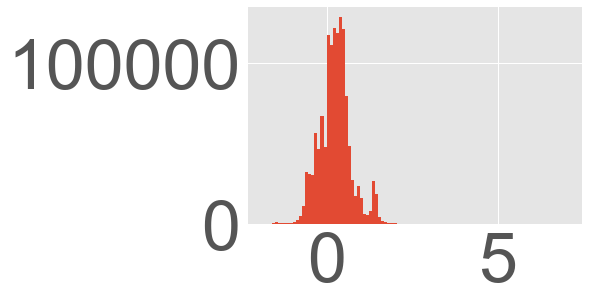

In [7]:
w = g.es["weight"]
print np.array(w)
plt.hist(w, 100)

# Calculate normalized distance for found edges

In [37]:
#groups = ["normal_mask", "down_mask"]
groups = ["mongoloids_mask", "mothers_mask"]
num_edges = g.ecount()
num_edges_remain = 100
dist = np.zeros((num_edges,), dtype = 'float32')
weights = np.array(g.es["weight"])
id_sample = 0
for k, e in enumerate(g.es):
    u, v = e.source, e.target
    d = calc_normalized_svc(X, np.array(y == 0), u, v, id_sample, config.params[groups[0]].value, config.params[groups[1]].value)[0]
    print(weights[k] - d)
    break
    dist[k] = d
    #e["weight"] = d
    if k % 100000 == 100000 - 1:
        print (k, '/', num_edges, d)
        break

-0.021687606389296565


In [26]:
k = num_edges - num_edges_remain
remove_ids = np.argpartition(dist, k)[:k]

gc = g.copy()
gc.delete_edges(remove_ids)
gc.delete_vertices([v.index for v in gc.vs if v.degree() == 0])

InternalError: Error at .\src\iterators.c:1828: Cannot create iterator, invalid edge id, Invalid vertex id

In [36]:
gc.delete_vertices([v.index for v in gc.vs if v.degree() == 0])

(array([1.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 2.000e+00, 1.000e+00,
        3.000e+00, 1.000e+00, 3.000e+00, 2.000e+00, 2.000e+00, 3.000e+00,
        3.000e+00, 2.000e+00, 3.000e+00, 2.000e+00, 1.000e+00, 2.000e+00,
        2.000e+00, 5.000e+00, 6.000e+00, 6.000e+00, 8.000e+00, 1.000e+01,
        1.300e+01, 1.200e+01, 1.200e+01, 1.600e+01, 1.700e+01, 8.000e+00,
        1.400e+01, 1.700e+01, 2.600e+01, 2.800e+01, 3.900e+01, 4.500e+01,
        7.300e+01, 7.900e+01, 9.000e+01, 1.270e+02, 1.100e+02, 1.210e+02,
        2.140e+02, 2.090e+02, 2.310e+02, 3.470e+02, 3.680e+02, 4.870e+02,
        5.520e+02, 7.350e+02, 8.970e+02, 1.087e+03, 1.314e+03, 1.497e+03,
        1.890e+03, 2.422e+03, 3.420e+03, 3.155e+03, 3.093e+03, 3.219e+03,
        3.245e+03, 3.479e+03, 3.729e+03, 4.082e+03, 4.041e+03, 4.038e+03,
        4.394e+03, 4.566e+03, 4.538e+03, 4.538e+03, 4.488e+03, 4.330e+03,
        4.365e+03, 4.145e+03, 3.697e+0

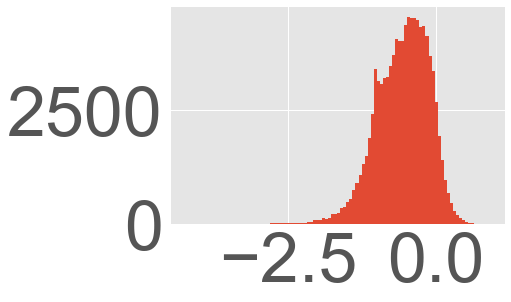

In [12]:
#print gc.vcount()
#print gc.ecount()
#igraph.plot(gc)
#print (dist > 1.01).sum()
#plt.hist(dist[dist > 1.01], 100)
plt.hist(dist[dist != 0], 100)

In [12]:
cur = g.es["weight"]
print np.array(cur[-100:])

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]


In [48]:
import struct
import array
def _graph_to_crs(g):
    if g.ecount() > g.vcount() * g.vcount() / 10:
        m = np.array(g.get_adjacency().data).astype('int8')
        m = scipy.sparse.csr_matrix(m)
    else:
        edges = np.array([np.array(edge.tuple) for edge in g.es])
        edges = np.concatenate([edges.T, [edges[:, 1], edges[:, 0]]], axis = 1)
        m = scipy.sparse.csr_matrix((np.ones(edges.shape[1]), edges), shape=(g.vcount(), g.vcount()))
    return m


def _save_crs(file_name, m):
    with open(file_name, 'wb') as f:
        n = int(m.shape[0])
        f.write(struct.pack('<i', n))
        f.write(struct.pack('<i', m.nnz))
        f.write(array.array('i', m.indices).tostring())
        f.write(array.array('i', m.indptr).tostring())

In [48]:
num_edges = 100
num_vs = 100
e_ids = np.argsort(np.array(g.es["weight"]))
#g.delete_edges(e_ids[:len(e_ids) - num_edges])
g.delete_vertices(range(g.vcount() - num_vs))
print(g.vs.select(_degree_eq = 0))
print(g.ecount())

92


In [51]:
num_vs = 500
for id_sample in config.params["id_sample"]:
    g = load_graph(config, X, genes_names, id_sample = id_sample)
    #e_ids = np.argsort(np.array(g.es["weight"]))
    #g.delete_edges(e_ids[:len(e_ids) - num_edges])
    #g.delete_vertices(range(g.vcount() - num_vs))
    graph_crs_path = config.ofname(["graphs_crs", "graph"], ext = ".bin", include_set = config.params_sets["graph"])
    ms = graph_to_crs(g)
    print (g.ecount())
    save_crs(graph_crs_path, ms)
    #break

F:\PC\UNN\Scientific\Gerontology\data\GSE52588\params\num_genes_15024\kde_mask_mothers_mask\algorithm_svc\graphs\graph_id_sample_0.npz
1433882


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  # Remove the CWD from sys.path while we load stuff.


F:\PC\UNN\Scientific\Gerontology\data\GSE52588\params\num_genes_15024\kde_mask_mothers_mask\algorithm_svc\graphs\graph_id_sample_1.npz
1436457
F:\PC\UNN\Scientific\Gerontology\data\GSE52588\params\num_genes_15024\kde_mask_mothers_mask\algorithm_svc\graphs\graph_id_sample_2.npz
1435596
F:\PC\UNN\Scientific\Gerontology\data\GSE52588\params\num_genes_15024\kde_mask_mothers_mask\algorithm_svc\graphs\graph_id_sample_3.npz
1412118
F:\PC\UNN\Scientific\Gerontology\data\GSE52588\params\num_genes_15024\kde_mask_mothers_mask\algorithm_svc\graphs\graph_id_sample_4.npz
1357528
F:\PC\UNN\Scientific\Gerontology\data\GSE52588\params\num_genes_15024\kde_mask_mothers_mask\algorithm_svc\graphs\graph_id_sample_5.npz
1429880
F:\PC\UNN\Scientific\Gerontology\data\GSE52588\params\num_genes_15024\kde_mask_mothers_mask\algorithm_svc\graphs\graph_id_sample_6.npz
1390451
F:\PC\UNN\Scientific\Gerontology\data\GSE52588\params\num_genes_15024\kde_mask_mothers_mask\algorithm_svc\graphs\graph_id_sample_7.npz
1420549

186539
F:\PC\UNN\Scientific\Gerontology\data\GSE52588\params\num_genes_15024\kde_mask_mothers_mask\algorithm_svc\graphs\graph_id_sample_59.npz
264934
F:\PC\UNN\Scientific\Gerontology\data\GSE52588\params\num_genes_15024\kde_mask_mothers_mask\algorithm_svc\graphs\graph_id_sample_60.npz
177695
F:\PC\UNN\Scientific\Gerontology\data\GSE52588\params\num_genes_15024\kde_mask_mothers_mask\algorithm_svc\graphs\graph_id_sample_61.npz
157001
F:\PC\UNN\Scientific\Gerontology\data\GSE52588\params\num_genes_15024\kde_mask_mothers_mask\algorithm_svc\graphs\graph_id_sample_62.npz
44270
F:\PC\UNN\Scientific\Gerontology\data\GSE52588\params\num_genes_15024\kde_mask_mothers_mask\algorithm_svc\graphs\graph_id_sample_63.npz
85010
F:\PC\UNN\Scientific\Gerontology\data\GSE52588\params\num_genes_15024\kde_mask_mothers_mask\algorithm_svc\graphs\graph_id_sample_64.npz
38719
F:\PC\UNN\Scientific\Gerontology\data\GSE52588\params\num_genes_15024\kde_mask_mothers_mask\algorithm_svc\graphs\graph_id_sample_65.npz
84

In [29]:
print len(ms.indices), len(ms.indptr), ms.shape[0]

 7359106 15023 15022


In [ ]:
diff_small_graph_path = config.ofname([["diff_graph"]], ext = ".npz", include_set = config.params_sets["diff_graph"])
diff_graph_edges_path = config.ofname([["diff_graph"]], ext = ".csv", include_set = config.params_sets["diff_graph"])
diff_graph_labels_path = config.ofname([["diff_graph", "labels"]], ext = ".csv", include_set = config.params_sets["diff_graph"])
save_graph(diff_small_graph_path, diff_graph_edges_path, diff_graph_labels_path, g_diff)

In [16]:
g.delete_vertices(vertices)

In [7]:
print g.ecount()
print g.vs["label"]

3679553


KeyError: 'Attribute does not exist'

In [47]:
cur = m_sum[2]
edges = np.array(np.unravel_index(np.argsort(cur.ravel()), m_sum[0].shape)).T
edges = edges[-30:]
print edges

[[151 201]
 [201 314]
 [ 67 201]
 [101 201]
 [120 201]
 [201 331]
 [111 201]
 [ 48 201]
 [201 328]
 [201 327]
 [100 201]
 [201 325]
 [ 43 201]
 [201 323]
 [175 201]
 [118 201]
 [ 14 201]
 [201 319]
 [ 62 201]
 [ 74 201]
 [ 77 201]
 [201 317]
 [201 316]
 [ 18  65]
 [182 340]
 [251 291]
 [176 251]
 [ 18 184]
 [ 18 293]
 [ 39 324]]


In [10]:
m_diff = np.logical_and(m_mongoloids_and, np.logical_not(m_siblings_or))
m_diff = np.logical_and(m_mongoloids_and, np.logical_not(m_mothers_or))

In [5]:
print m_mongoloids_and.sum(), m_mothers_or.sum()
#m_diff = np.logical_and(m_mongoloids_and, np.logical_not(m_mothers_or))
m_diff = m_mongoloids_and
'''
np.savez_compressed(diff_graph_path, 
                    m_diff = m_diff, 
                    m_mongoloids_and = m_mongoloids_and, 
                    m_mongoloids_or = m_mongoloids_or, 
                    m_siblings_and = m_siblings_and, 
                    m_siblings_or = m_siblings_or,
                    m_mothers_or = m_mothers_or,
                    m_mothers_and = m_mothers_and)
'''
print m_diff.sum()

22297 62122057
22297


In [40]:
print vertices
print genes_names[vertices]
print len(np.unique(vertices))

[   61   104   313   403   712   751   833  1083  1255  1301  1306  1323
  1573  1624  1672  1815  2321  2515  2555  2771  2947  2977  3083  3251
  3277  3283  3494  3523  3536  3563  3685  3758  3798  3917  4006  4069
  4122  4142  4420  4496  4504  4822  4911  4967  5200  5347  5418  5459
  5554  5607  5699  5824  5980  6065  6111  6179  6214  6441  6457  6482
  6601  6779  6802  6822  6912  7065  7149  7771  8001  8112  8180  8275
  8646  8699  8955  9077  9343  9603 10096 10123 10277 10308 10650 10843
 10875 10985 11008 11068 11309 11400 11511 11950 11991 12020 12086 12180
 12347 12412 12476 12600 12965 13088 13217 13327 13374 13585 13821 13911
 13961 14013 14599 14755 14998]
['CMAH' 'DLL1' 'OLFML2A' 'PTPN3' 'GALE' 'GDF10' 'LYNX1' 'NUF2' 'MATN2'
 'RAI14' 'LDB3' 'SOX10' 'PYDC1' 'HIST1H2BB' 'SLC4A3' 'IGFBP1' 'FBXL5'
 'NAPEPLD' 'CENPBD1' 'RNF181' 'RBBP9' 'SMARCD3' 'BHLHA15' 'DOM3Z' 'COX4I2'
 'STK19' 'FTHL3' 'DSC2' 'SH3GL1' 'ZNF347' 'ATPAF1' 'FSD1' 'TMEM125'
 'FOXP4' 'LGR4' 'LAMA3' 'KC

In [82]:
intersect_genes_ = np.sort(np.array(list(set(genes_ids_) & set(vertices))))
print genes_names[vertices], len(vertices)
for gene_id in vertices:
    print genes_names[gene_id]

NameError: name 'genes_ids_' is not defined

In [6]:
#m_diff_s = np.delete(m_diff, (11511), axis=0)
#m_diff_s = np.delete(m_diff_s, (11511), axis=1)
e_diff = np.transpose(np.nonzero(m_diff))
print e_diff.shape
#mask = (e_diff[:, 0] != 2013) & (e_diff[:, 1] != 2013)
vertices = np.sort(np.unique(np.concatenate([e_diff[:, :].flatten()])))
#print vertices, len(vertices)

m_sub = m_diff[np.ix_(vertices, vertices)]
e_diff = np.transpose(np.nonzero(m_sub))

#g_diff = igraph.Graph.Adjacency(m_diff.tolist(), mode=igraph.ADJ_UNDIRECTED)
#g_diff = igraph.Graph.Adjacency(m_diff.tolist(), mode=igraph.ADJ_UNDIRECTED)
#vertices = #range(m_sub.shape[0])
print len(vertices), e_diff.shape[0]
g_diff = igraph.Graph(vertex_attrs={"label":genes_names[vertices]}, edges=e_diff.tolist(), directed=False)

(1935L, 2L)
1850 1935


In [10]:
print vertices

[    2     3    19 ... 14996 15006 15016]


In [75]:
print cpgs_names[vertices]

['cg00075967' 'cg03103192' 'cg09418283']


In [81]:
for v in vertices:
    print genes_names[v], v
for e in e_diff:
    print e[0], e[1]

RUNX1 676
ABHD6 3534
GLUD1 6350
MAN2A1 8652
GPAA1 12405
FAM35A 12469
0 2
0 5
1 4
3 4


In [33]:
print np.nonzero(genes_names == 'KIF13A')


(array([2013], dtype=int64),)


In [77]:
a = g_diff.degree()
print genes_names[11511]

for i, x in enumerate(a):
    if x > 1:
        print i, x

CCDC60
7 2
8 7
27 2
31 5
32 2
35 2
45 13


In [15]:
print g_diff.ecount(), g_diff.vcount(), len(genes_names)

850 142987 150254


In [7]:
#g_and = np.logical_and(m_mongoloids, m_siblings)
g_diff = g
print m_diff.sum(), g_diff.ecount(), g_diff.vcount()

1935 3679553 15022


[0,
 1,
 3,
 4,
 6,
 8,
 9,
 11,
 15,
 17,
 18,
 19,
 20,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164]

In [12]:
g = g_diff.copy()
g.vs["label"] = genes_names
#g.delete_edges([g.incident(v.index)[0] for v in g.vs if v.degree() == 1])

diff_graph_path = config.ofname("diff_graph", ext = ".tsv", include_set = config.params_sets["diff_graph"])
graph_to_dataframe(g).to_csv(diff_graph_path, sep = '\t')

In [11]:
g = g_and[0].copy()
g.vs["label"] = genes_names
g.delete_vertices([v.index for v in g.vs if v.degree() < 1])

ds_intersection_graph_path = config.ofname("ds_intersection_graph", ext = ".tsv", include_set = config.params_sets["diff_graph"])
graph_to_dataframe(g).to_csv(ds_intersection_graph_path, sep = '\t')

In [12]:
ds_intersection_graph_path

'D:\\PC\\UNN\\Science\\Gerontology\\data\\GSE52588\\params\\num_genes_14756\\kde_mask_siblings_mask\\algorithm_pdf\\thr_type_best\\division_rule_non_control\\ds_intersection_graph.tsv'

In [15]:
g = g_diff.copy()
g.vs["label"] = genes_names
g.delete_vertices([v.index for v in g.vs if v.degree() < 1])

layout = g.layout("kk")
#layout = g.layout("circle")
#igraph.plot(g, layout = layout)

visual_style = {}
visual_style["font_size"] = 5
visual_style["vertex_label_size"] = 10
#visual_style["vertex_color"] = [color_dict[gender] for gender in g.vs["gender"]]
visual_style["vertex_label"] = g.vs["label"]
#visual_style["edge_width"] = [1 + abs(weight) for weight in g.es["weight"]]
visual_style["layout"] = layout
visual_style["bbox"] = (700, 700)
visual_style["margin"] = 50
visual_style["vertex_label_dist"] = 1.1
visual_style["vertex_shape"] = "circle"

fig_g = igraph.plot(g, **visual_style)
fig_graph_path = config.ofname("diff_graph", ext = ".png", include_set = config.params_sets["diff_graph"])
fig_g.save(fig_graph_path)

In [43]:
g_union.vcount()

27

In [44]:
graph_to_dataframe(g_union)

,v1,v2,gene_1,gene_2
0,0,18,FLJ39609,PKD1
1,1,15,DNAJC6,LRP6
2,2,14,ASAP2,LRP5
3,2,18,ASAP2,PKD1
4,3,15,GABRA2,LRP6
5,4,15,PCDH10,LRP6
6,5,18,SRF,PKD1
7,6,10,NUDT1,FZD6
8,7,18,TNRC18,PKD1
9,8,15,DLX6AS,LRP6


In [37]:
gcur.vcount()

2

In [12]:
for edge in gs[0].es:
    e = edge.tuple
    print(e[0], e[1])
    break

0 7358


25 14369


(array([0.625, 0.65 , 0.675, 0.7  ]), <a list of 4 Text yticklabel objects>)

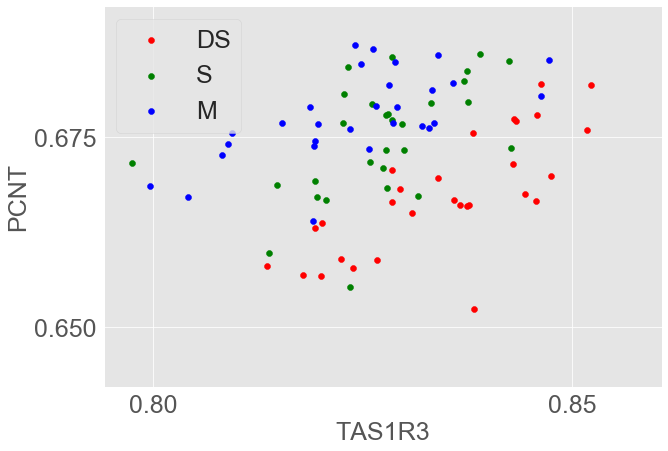

In [8]:
feature_1 = 'TAS1R3'
feature_2 = 'PCNT'

id1 = np.flatnonzero(genes_names == feature_1)[0]
id2 = np.flatnonzero(genes_names == feature_2)[0]
print(id1, id2)
#id1 = 0
#id2 = 59
plt.figure(figsize=(10, 7))
plt.scatter(X[:29, id1], X[:29, id2], c = 'r')
plt.scatter(X[29:29*2, id1], X[29:29*2, id2], c = 'g')
plt.scatter(X[29*2:29*3, id1], X[29*2:29*3, id2], c = 'b')

plt.legend(['DS', 'S', 'M'], fontsize = 25)
plt.xlabel(feature_1, fontsize = 25)
plt.ylabel(feature_2, fontsize = 25)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)

In [24]:
X.shape

(87, 114674)

In [9]:
print(config.ofname(['f'], ext = ".tsv", include_set = config.params_sets["diff_graph"]))

D:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_cpgs_114674\kde_mask_siblings_mask\algorithm_pdf\thr_type_best\division_rule_non_control\f.tsv


In [ ]:
#layout = g_imp.layout("kk")
#layout = g_diff.layout("sphere")
#igraph.plot(g_imp, layout = layout)

In [13]:
# calculate dendrogram
comm = g_diff.community_multilevel(return_levels = True)
print comm
#m_comm = m_diff

In [19]:
def plot_adjacency(m, title_name, id_group, fig = None):
    import matplotlib.colors
    if fig is None:
        fig = plt.figure(figsize = (30, 30))
    plt.figure(fig.number)
    colors = ['red', 'blue']
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["white", colors[id_group]])
    plt.title(title_name, size = fontsize)
    plt.imshow(m, cmap = cmap)

In [63]:
m = np.array(g_thr.get_adjacency().data)

KeyboardInterrupt: 

In [ ]:
plot_adjacency(m, "", 0, fig = None)

In [11]:
fcomm = g_diff.community_fastgreedy()

In [ ]:
igraph.plot(fcomm)

In [12]:
#igraph.plot(comm, mark_groups = True)
#comm = comms[0]
#
cl_g = comm[1].cluster_graph()
print cl_g.ecount(), cl_g.vcount()
igraph.plot(cl_g)

IndexError: list index out of range

In [59]:
print len(comm)
for i in range(len(comm)):
    if len(comm[i]) > 1:
        print i, len(comm[i])

11
0 2
1 8
2 2
3 3
4 2
5 727
6 2
7 2
8 7
9 4
10 14


In [60]:
# 128, 1
mycomm = comm[5]
print len(mycomm)
m_comm = m_diff[np.ix_(mycomm, mycomm)]
g_comm = igraph.Graph.Adjacency(m_comm.tolist(), mode=igraph.ADJ_UNDIRECTED)
comm = g_comm.community_multilevel()
print g_comm.ecount(), g_comm.vcount()

727
0 727


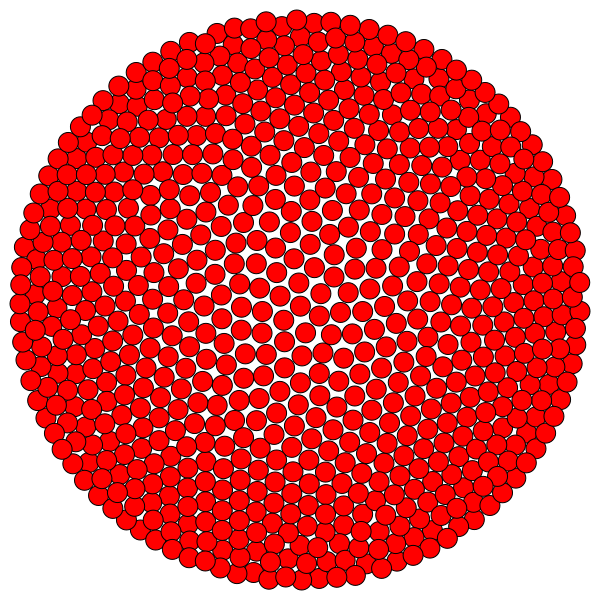

In [55]:
g = g_comm
layout = g.layout("kk")
igraph.plot(g)

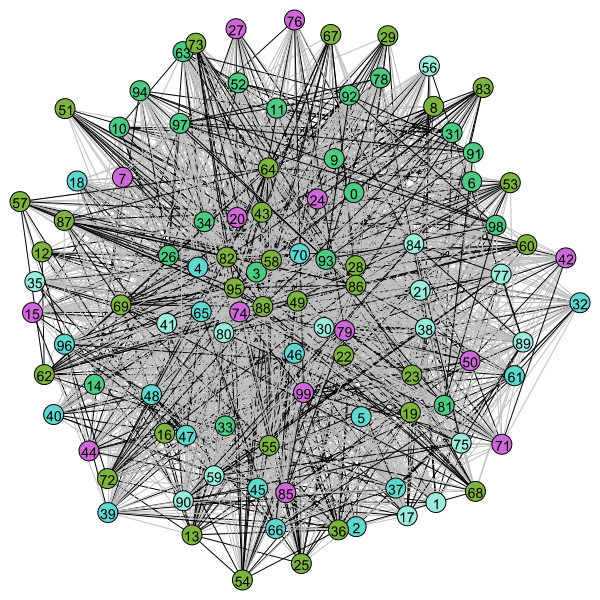

In [93]:
from random import randint

membership = comm.membership

if membership is not None:
    gcopy = g.copy()
    edges = []
    edges_colors = []
    for edge in g.es():
        if membership[edge.tuple[0]] != membership[edge.tuple[1]]:
            edges.append(edge)
            edges_colors.append("gray")
        else:
            edges_colors.append("black")
    gcopy.delete_edges(edges)
    layout = gcopy.layout("kk")
    g.es["color"] = edges_colors
else:
    layout = g.layout("kk")
    g.es["color"] = "gray"
visual_style = {}
visual_style["vertex_label_dist"] = 0
visual_style["vertex_shape"] = "circle"
visual_style["edge_color"] = g.es["color"]
# visual_style["bbox"] = (4000, 2500)
visual_style["vertex_size"] = 30
visual_style["layout"] = layout
visual_style["bbox"] = (1024, 768)
visual_style["margin"] = 40
#visual_style["edge_label"] = g.es["weight"]
for vertex in g.vs():
    vertex["label"] = vertex.index
if membership is not None:
    colors = []
    for i in range(0, max(membership)+1):
        colors.append('%06X' % randint(0, 0xFFFFFF))
    for vertex in g.vs():
        vertex["color"] = str('#') + colors[membership[vertex.index]]
    visual_style["vertex_color"] = g.vs["color"]
igraph.plot(g)


In [91]:
def func():
    igraph.plot(g)

In [5]:
interest_features = ["cg17571279", "cg07962882", "cg00012522", "cg00079302"]
id_features = []
for feature in interest_features:
    x = (genes_names == feature).nonzero()[0]
    #cur = (vertices == x[0]).nonzero()[0]
    id_features.append((feature, x[0]))
id_features

[('cg17571279', 96123),
 ('cg07962882', 46577),
 ('cg00012522', 96),
 ('cg00079302', 544)]

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def calc_anti_intersection(clf, data, control_mask, diseased_mask):
    dist = clf.decision_function(data)
    #print dist.shape
    #print dist
    gap = dist[diseased_mask].min() - dist[control_mask].max()
    #print diseased_mask, control_mask
    #print dist[diseased_mask], dist[control_mask]
    return gap

def calc_svc_models(X, y, control_mask, diseased_mask):
    # we create an instance of SVM and fit out data. We do not scale our
    # data since we want to plot the support vectors
    C = 1.0  # SVM regularization parameter
    models = (svm.LinearSVC(C = 1, class_weight = "balanced"),#svm.SVC(kernel='linear', C=C), 
              #svm.LinearSVC(),
              #svm.SVC(kernel='rbf', gamma=0.7, C=C),
              #svm.SVC(kernel='poly', degree=3, C=C)
             )
    models = (clf.fit(X, y) for clf in models)

    for clf in models:
        return calc_anti_intersection(clf, X, control_mask, diseased_mask), clf

def scater_down_syndrome(ax, xu, xv, Y, gene_name_u, gene_name_v):
    labels = ['Down', 'Siblings', 'Mothers']
    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    ax.set_prop_cycle('color', [colors[0], colors[5], colors[1]])

    for c in [0, 1, 2]:
        ax.scatter(xu[Y == c], xv[Y == c], 500, label = labels[c], alpha=0.7)

    for j in range(len(xu)):
        ax.text(xu[j], xv[j], str(j), horizontalalignment='center', verticalalignment='center', fontsize = 15)

    mean_p = []
    for c in [0, 1, 2]:
        mean_p.append([xu[Y == c].mean(), xv[Y == c].mean()])
    for c in [0, 1]:
        #plt.arrow(mean_p[2][0], mean_p[2][1], mean_p[c][0] - mean_p[2][0], mean_p[c][1] - mean_p[2][1], color = 'k')
        ax.annotate("", xy=(mean_p[c][0], mean_p[c][1]), xycoords='data', xytext=(mean_p[2][0], mean_p[2][1]),  textcoords='data', arrowprops=dict(shrink = 4,facecolor='black'), fontsize=20)

    #k = (mean_p[0][1] - mean_p[2][1]) / (mean_p[0][0] - mean_p[2][0])
    #if abs(k) > k_thr or abs(k) < 1.0 / k_thr:
    #    continue
    #s = "k = {:0.2e}".format(k)
    #plt.text(0.17, 0.95, s, horizontalalignment='center', verticalalignment='center', transform = ax.transAxes, fontsize = 50)

    ax.set_xlabel(gene_name_u, fontsize=70)
    ax.set_ylabel(gene_name_v, fontsize=70)
    ax.legend(framealpha=0.9, fontsize=50, bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=3, mode="expand", borderaxespad=0., handletextpad=0.3, scatterpoints=3)    

def scater_down_syndrome_2(ax, xu, xv, Y, gene_name_u, gene_name_v):
    labels = ['Down', 'Health']
    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    ax.set_prop_cycle('color', [colors[0], colors[5]])

    for c in [0, 1]:
        ax.scatter(xu[Y == c], xv[Y == c], 500, label = labels[c], alpha=0.7)

    for j in range(len(xu)):
        ax.text(xu[j], xv[j], str(j), horizontalalignment='center', verticalalignment='center', fontsize = 15)

    mean_p = []
    for c in [0, 1]:
        mean_p.append([xu[Y == c].mean(), xv[Y == c].mean()])
    #for c in [0]:
        #plt.arrow(mean_p[2][0], mean_p[2][1], mean_p[c][0] - mean_p[2][0], mean_p[c][1] - mean_p[2][1], color = 'k')
    #    ax.annotate("", xy=(mean_p[c][0], mean_p[c][1]), xycoords='data', xytext=(mean_p[2][0], mean_p[2][1]),  textcoords='data', arrowprops=dict(shrink = 4,facecolor='black'), fontsize=20)

    #k = (mean_p[0][1] - mean_p[2][1]) / (mean_p[0][0] - mean_p[2][0])
    #if abs(k) > k_thr or abs(k) < 1.0 / k_thr:
    #    continue
    #s = "k = {:0.2e}".format(k)
    #plt.text(0.17, 0.95, s, horizontalalignment='center', verticalalignment='center', transform = ax.transAxes, fontsize = 50)

    ax.set_xlabel(gene_name_u, fontsize=70)
    ax.set_ylabel(gene_name_v, fontsize=70)
    ax.legend(framealpha=0.9, fontsize=50, bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=3, mode="expand", borderaxespad=0., handletextpad=0.3, scatterpoints=3)    
    
def scater_cancer(ax, xu, xv, Y, gene_name_u, gene_name_v):
    labels = ['Control', 'Health', 'Cancer']
    names = ['control_mask', 'health_mask', 'cancer_mask']
    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    ax.set_prop_cycle('color', [colors[0], colors[5], colors[1]])

    for c in [0, 1, 2]:
        cur_mask = config.params[names[c]].value
        ax.scatter(xu[cur_mask], xv[cur_mask], 500, label = labels[c], alpha=0.7)

    for j in range(len(xu)):
        ax.text(xu[j], xv[j], str(j), horizontalalignment='center', verticalalignment='center', fontsize = 15)

    mean_p = []
    for c in [0, 1, 2]:
        cur_mask = config.params[names[c]].value
        mean_p.append([xu[cur_mask].mean(), xv[cur_mask].mean()])
    for c in [0, 1]:
        #plt.arrow(mean_p[2][0], mean_p[2][1], mean_p[c][0] - mean_p[2][0], mean_p[c][1] - mean_p[2][1], color = 'k')
        ax.annotate("", xy=(mean_p[c][0], mean_p[c][1]), xycoords='data', xytext=(mean_p[2][0], mean_p[2][1]),  textcoords='data', arrowprops=dict(shrink = 4,facecolor='black'), fontsize=20)

    #k = (mean_p[0][1] - mean_p[2][1]) / (mean_p[0][0] - mean_p[2][0])
    #if abs(k) > k_thr or abs(k) < 1.0 / k_thr:
    #    continue
    #s = "k = {:0.2e}".format(k)
    #plt.text(0.17, 0.95, s, horizontalalignment='center', verticalalignment='center', transform = ax.transAxes, fontsize = 50)

    ax.set_xlabel(gene_name_u, fontsize=70)
    ax.set_ylabel(gene_name_v, fontsize=70)
    ax.legend(framealpha=0.9, fontsize=50, bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=3, mode="expand", borderaxespad=0., handletextpad=0.3, scatterpoints=3)    
    
    
def plot_kde(ax, xu, xv):
    kde_mask = config.params[config.params["kde_mask"].value].value
    data = np.array([xu[kde_mask], xv[kde_mask]]).astype('float32')
    kde = stats.gaussian_kde(data)
    x_min = np.min(xu)
    x_max = np.max(xu)
    y_min = np.min(xv)
    y_max = np.max(xv)
    Xm, Ym = np.mgrid[x_min:x_max:500j, y_min:y_max:500j]
    positions = np.vstack([Xm.ravel(), Ym.ravel()])
    Z = np.reshape(kde(positions).T, Xm.shape) # score_samples
    im = ax.imshow(np.rot90(Z), cmap="jet", extent=[x_min, x_max, y_min, y_max], aspect='auto')

def plot_kde_dist(fig, ax, xu, xv, threshold_p = 0.9, num_points = 100000):
    kde_mask = config.params[config.params["kde_mask"].value].value
    data = np.array([xu[kde_mask], xv[kde_mask]]).astype('float32')
    kde = stats.gaussian_kde(data)

    points = kde.resample(num_points)
    pr = np.array(kde(points))
    pr = np.sort(pr)
    
    x_min = np.min(xu)
    x_max = np.max(xu)
    y_min = np.min(xv)
    y_max = np.max(xv)

    Xm, Ym = np.mgrid[x_min:x_max:500j, y_min:y_max:500j]
    positions = np.vstack([Xm.ravel(), Ym.ravel()])
    #threshold_p = 0.9
    ZI = np.zeros(Xm.shape[0] * Xm.shape[1])
    for i, pt in enumerate(positions.T):
        p = kde(np.array([pt[0], pt[1]])) # .reshape(1, -1)
        pos = np.searchsorted(pr, p)
        w = float(num_points - pos) / num_points
        ZI[i] = w
        if ZI[i] < threshold_p:
            ZI[i] = 0
    ZI = np.reshape(ZI, Xm.shape)
    #ZI = np.log(1 - ZI, Xm.shape)
    
    im = ax.imshow(np.rot90(ZI), cmap="jet", extent=[x_min, x_max, y_min, y_max], aspect='auto')#, norm=matplotlib.colors.LogNorm())
    fig.colorbar(im)

    
def plot_calc_models(X, y, xu, xv, Y, gene_name_u, gene_name_v):
    # we create an instance of SVM and fit out data. We do not scale our
    # data since we want to plot the support vectors
    C = 1.0  # SVM regularization parameter
    models = (svm.SVC(kernel='linear', C=C),
              svm.LinearSVC(C=C),
              svm.SVC(kernel='rbf', gamma=0.7, C=C),
              svm.SVC(kernel='poly', degree=3, C=C))
    models = (clf.fit(X, y) for clf in models)

    # title for the plots
    titles = ('SVC with linear kernel',
              'LinearSVC (linear kernel)',
              'SVC with RBF kernel',
              'SVC with polynomial (degree 3) kernel')

    # Set-up 2x2 grid for plotting.
    fig, sub = plt.subplots(2, 2)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)

    
    for clf, title, ax in zip(models, titles, sub.flatten()):
        #calc_anti_intersection(clf, X, Y)
        plot_contours(ax, clf, xx, yy,
                      cmap=plt.cm.coolwarm, alpha=0.8)
        ax.set_title(title)
        #plt.gcf().subplots_adjust(bottom=0.15, top=0.9, left=0.23, right=0.9)
        #scater_down_syndrome(ax, xu, xv, Y, gene_name_u, gene_name_v)
        scater_cancer(ax, xu, xv, Y, gene_name_u, gene_name_v)
        continue
    
    plt.gcf().legend(framealpha=0.9, fontsize=50, bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=3, mode="expand", borderaxespad=0., handletextpad=0.3, scatterpoints=3)
        
    '''
    pair_genes_path = config.ofname([["pair_genes", gene_name_u, gene_name_v]], ext = ".png", include_set = config.params_sets["pair_genes"])
    plt.savefig(pair_genes_path)
    plt.close(fig)
    '''

    plt.show()
    

def calc_normalized_svc(X, y, u, v, id_sample, mask_1, mask_2):
    xu = X[:, u]
    xv = X[:, v]

    xu = (xu - xu.mean()) / xu.std()
    xv = (xv - xv.mean()) / xv.std()

    data = np.array([xu, xv]).T
    assert(len(np.unique(y)) == 2)
    _, clf = calc_svc_models(data, y, mask_1, mask_2)
    return clf.decision_function(data[id_sample, :].reshape(1, -1))


In [46]:
from time import time
def genes_pair_svc(X, y):
    m_dist = np.full((X.shape[1], X.shape[1]), -np.inf)
    y = y.flatten()
    
    for u in range(X.shape[1]):#genes_top:
        be = time()
        
        for v in range(X.shape[1]): # genes_top:
            #if u <= v: continue 
            xu = X[:, u]
            xv = X[:, v]

            xu = (xu - xu.mean()) / xu.std()
            xv = (xv - xv.mean()) / xv.std()

            data = np.array([xu, xv]).T
            #control_mask = np.concatenate([config.params['mothers_mask'].value, config.params['siblings_mask'].value])
            y = y == 0
            assert(len(np.unique(y)) == 2)
            m_dist[u, v] = calc_svc_models(data, y, config.params['siblings_mask'].value, config.params['mongoloids_mask'].value)
            #m_dist[u, v] = calc_svc_models(data, y, config.params['control_mask'].value, config.params['cancer_mask'].value)
            #if v % 1000 == 0:
            #    print v, time() - be, m_dist[u, :(v+1)].max()
        print u, time() - be, (m_dist[u] > 1).sum(), m_dist[u, :].max()
    return m_dist

m_dist = genes_pair_svc(X, y)
#print X[0,0]

SyntaxError: invalid syntax (<ipython-input-46-c060cacc5ebf>, line 25)

In [63]:
#I, J = np.unravel_index((m_dist > 1).argmax(), m_dist.shape)
#print I, J, m_dist[I, J]
I, J = np.nonzero(m_dist > 0)
print I, J

[] []


In [14]:
def make_interesting_edges():
    vertices = np.arange(len(genes_names))
    edges = [
            ["JSRP1", "LRIT1"], 
            ["LRIT1", "CPT1B"], 
            ["JSRP1", "PGF"],
            ["DNAH10", "CHKB-CPT1B"],
            ["DNAH10", "JSRP1"],
            ["LOC100130274", "ANKRD20B"],
            ["FLJ12825", "GLI4"],
            ["GREM2", "PCDHB13"],
            ["GREM2", "PCDHB8"],
            ["GREM2", "PCDHB12"],
            ["ANKRD20B", "SLC9A10"],
            ["ANKRD20B", "TMEM160"],
            ["ANKRD20B", "PIK3R4"],
            ["ANKRD20B", "KIAA1529"],
            ["ANKRD20B", "TBC1D15"],
            ["ANKRD20B", "ZNF208"],
            ["PCDHB16", "C19orf41"],
            ["CHAT", "GLI4"],
            ["KCNE1", "PCDHB12"],
            ["ZNF322B", "PCDHB6"],
            ["CXCR7", "GLI4"],
            ["ZBTB22", "FBXL5"],
            ["COQ3", "PCDHB19P"],
            ["TBPL2", "PCDHB13"],
            ["TBPL2", "PCDHB19P"],
            ["SNX26", "PCDHB19P"],
            ["LOC389458", "PCDHB13"],
            ["GLI4", "PCDHB13"],
            ["PON3", "PCDHB19P"]
        ]
    edges = [
            ["cg17571279", "cg07962882"],
            ["cg00012522", "cg00079302"],
            ["cg17571279", "cg00079302"],
            ["cg07962882", "cg00079302"],
            ["cg17571279", "cg00012522"],
            ["cg07962882", "cg00012522"],
        ]
    edges = [
        ["KAZALD1", "PLTP"],
        #["TAS1R3", "PCNT"]
    ]
    for i in range(len(edges)):
        edges[i][0] = gname(edges[i][0])
        edges[i][1] = gname(edges[i][1])
    
    return vertices, np.array(edges)

make_interesting_edges()

(array([    0,     1,     2, ..., 14753, 14754, 14755]),
 array([[ 7698, 14057]], dtype=int64))

7698 14057 KAZALD1 PLTP
(87, 2)


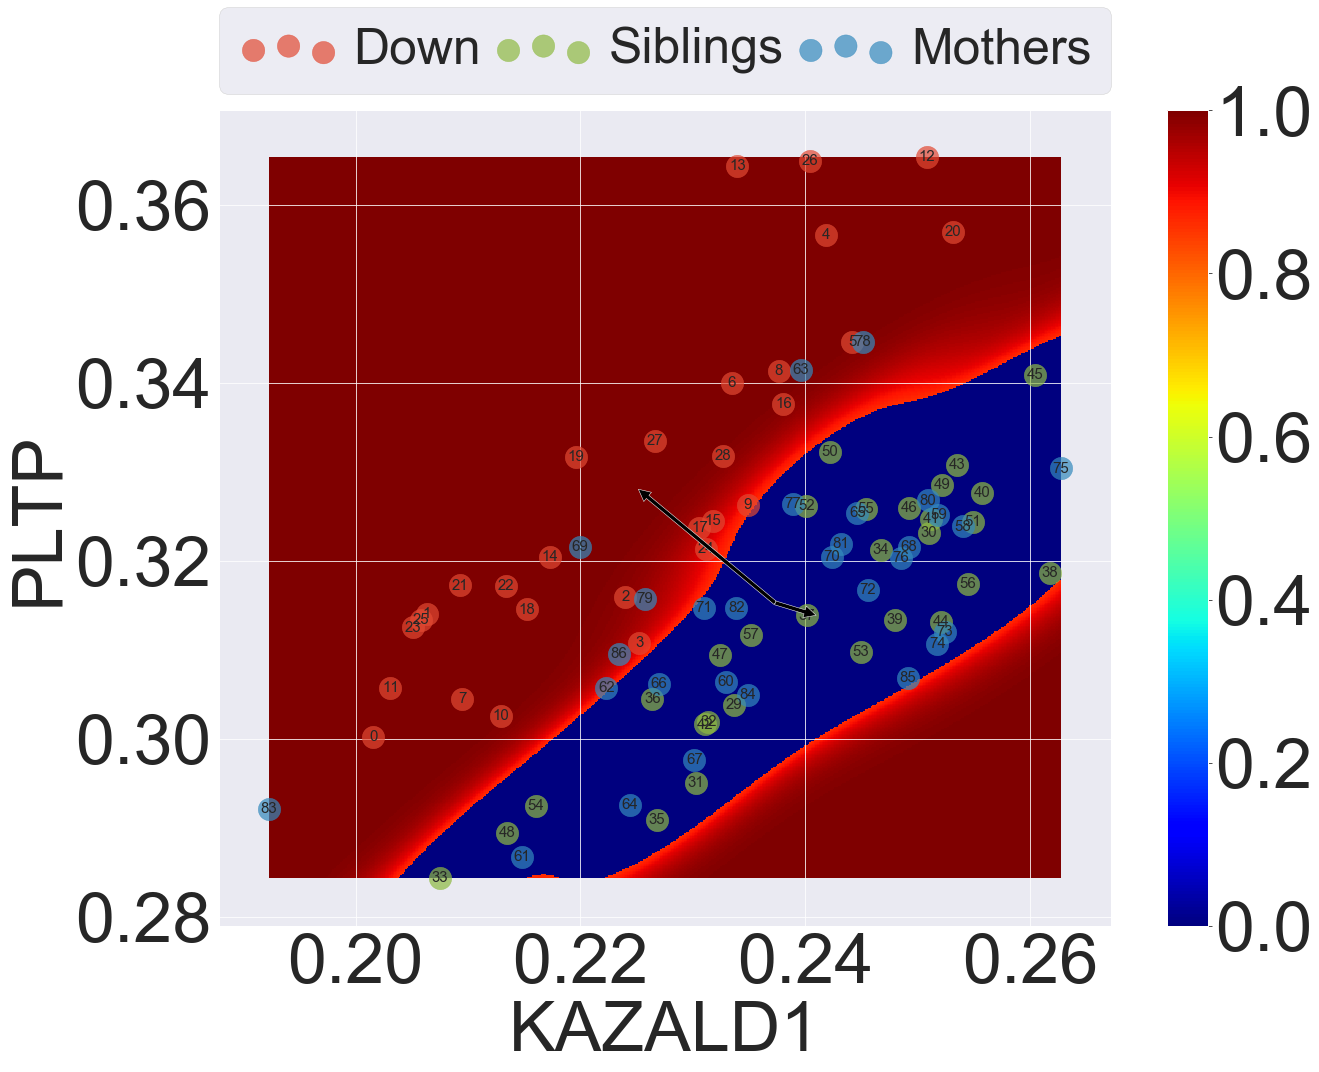

In [27]:
def genes_pair_plot(X, y, vertices, edges, genes_names):
    #edges = np.concatenate((edges, np.array([edges[:, 1], edges[:, 0]]).T))
    
    import seaborn
    seaborn.set_style('darkgrid', {'legend.frameon':True})
    
    config.params["id_pair"] = param(value_be = 0, value_en = len(edges) - 1, num_ticks = len(edges), name = 'id_pair', manual_ticks = True)
    y = y.flatten()
    pu = -1
    k_thr = 3
    
    for i, e in enumerate(edges):
        config.params["id_pair"].set_tick(i)
        fig = plt.figure(figsize=(20,15))
        ax = plt.gca()
        #fig.set_visible(not fig.get_visible())
        
        
        u = vertices[e[0]]
        v = vertices[e[1]]
        print (u, v, genes_names[u], genes_names[v])
        xu = X[:, u]
        xv = X[:, v]
        
        #xu = (xu - xu.mean()) / xu.std()
        #xv = (xv - xv.mean()) / xv.std()
        
        #mothers_mask = config.params["mothers_mask"].value
        #mongoloids_mask = config.params["mongoloids_mask"].value
        data = np.array([xu, xv]).astype('float32').T
        print (data.shape)
        
        plot_kde_dist(fig, ax, xu, xv, threshold_p = 0.86)
        scater_down_syndrome(ax, xu, xv, y, genes_names[u], genes_names[v])
        plt.show()
        continue

        pair_genes_path = config.ofname([["kdes", genes_names[u], genes_names[v]]], ext = ".png", include_set = config.params_sets["kdes"])
        plt.savefig(pair_genes_path)
        plt.close(fig)

        #scater_cancer(ax, xu, xv, y, genes_names[u], genes_names[v])
        #plot_calc_models(data, y == 0, xu, xv, y, genes_names[u], genes_names[v])
        #break
        
        
#edges = [[135, 28],[28, 135],[135, 33]]
#edges = [[0,1],[1,2]]
#edges = np.array(e_diff)

#print genes_names[vertices]
#horvath
#vertices = np.array([0, 24, 68, 269, 223, 36, 306])
#edges = np.array([[0, 1], [0, 2], [0, 3], [0, 4], [5, 4], [5, 6]])
config.params["kde_mask"].value = "siblings_mask"
vertices = np.arange(X.shape[1])
#edges = [e.tuple for e in g_diff.es]
#edges = [edge.tuple, edge.tuple]
#print edges.shape
vertices, edges = make_interesting_edges()
#vertices = np.arange(X.shape[1])
#edges = [[39, 324], [18, 293]]
genes_pair_plot(X, y, vertices, edges, genes_names)
#genes_pair_plot(X, y, vertices, edges, genes_names)
#genes_pair_plot(X, y, np.array([id1,id2]), np.array([[0,1],[1,0]]), genes_names)
#genes_pair_plot(X, y, np.array([0,1]), np.array([[0,1],[1,0]]), genes_names)
#genes_pair_plot(X, y, np.array([I,J]), np.array([[0,1],[1,0]]), cpgs_names)

In [14]:
param(value_be = 0, value_en = len(edges) - 1, num_ticks = len(edges), name = 'id_pair', manual_ticks = True)

In [43]:
edges[1:3]

[(1, 1712), (1, 4556)]

In [3]:
import numpy as np
print np.arange(0, 110, 5)

[  0   5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85
  90  95 100 105]


In [22]:
def get_correlated_edges(X, y, edges, vertices = None):
    #edges = np.concatenate((edges, np.array([edges[:, 1], edges[:, 0]]).T))
    y = y.flatten()
    k_thr = 5
    edges_corr = []
    weights_corr = []
    for i, e in enumerate(edges):
        if vertices is None:
            u = e[0]
            v = e[1]
        else:
            u = vertices[e[0]]
            v = vertices[e[1]]
        xu = X[:, u]
        xv = X[:, v]
        
        xu = (xu - xu.mean()) / xu.std()
        xv = (xv - xv.mean()) / xv.std()
        mean_p = []
        for c in [0, 1, 2]:
            mean_p.append([xu[y == c].mean(), xv[y == c].mean()])
        
        k = (mean_p[0][1] - mean_p[2][1]) / (mean_p[0][0] - mean_p[2][0])
        if abs(k) > k_thr or abs(k) < 1.0 / k_thr:
            continue
        if abs(k) < 1:
            k = 1 / k
            e[0], e[1] = e[1], e[0] 
        edges_corr.append(e)
        weights_corr.append(k)
    return np.array(edges_corr), np.array(weights_corr)
#edges_corr, weights_corr = get_correlated_edges(X, y, e_diff, vertices)
#print edges_corr.shape

In [11]:
g_corr = igraph.Graph(vertex_attrs={"label":genes_names[vertices]}, edges=edges_corr.tolist(), directed=True)
v_empty = np.flatnonzero((np.array(g_corr.degree()) == 0).flatten()).tolist()
g_corr.delete_vertices(list(v_empty))
g_corr.es["weight"] = weights_corr

In [10]:
def save_graph(graph_path, graph_path_csv, graph_path_labels, g):
    import csv
    labels = g.vs["label"]
    #weights = g.es["weight"]
    
    edges = [edge.tuple for edge in g.es]
    
    lines = []
    for edge in edges:
        lines.append([labels[edge[0]], labels[edge[1]]])
    
    with open(graph_path_csv, 'w') as writeFile:
        writer = csv.writer(writeFile)
        writer.writerows(lines)
    
    
    lines = []
    degrees = g.degree()
    for i in range(len(labels)):
        lines.append([labels[i], degrees[i]])
    
    with open(graph_path_labels, 'w') as writeFile:
        writer = csv.writer(writeFile)
        writer.writerows(lines)
    
    #with open(graph_path_labels, 'w') as writeFile:
    #    writeFile.write("\n".join(labels))
        #writer = csv.writer(writeFile)
        #writer.writerows(labels)
    
    np.savez_compressed(graph_path, 
                        labels = labels, 
                        #weights = weights, 
                        edges = edges)

def load_graph(graph_path):
    g_data = np.load(graph_path)
    g = igraph.Graph(vertex_attrs={"label":g_data["labels"]}, edges=g_data["edges"].tolist(), directed=False)
    return g
    
#diff_small_graph_path = config.ofname([["diff_graph"]], ext = ".npz", include_set = config.params_sets["diff_graph"])
#diff_graph_edges_path = config.ofname([["diff_graph"]], ext = ".csv", include_set = config.params_sets["diff_graph"])
#diff_graph_labels_path = config.ofname([["diff_graph", "labels"]], ext = ".csv", include_set = config.params_sets["diff_graph"])
#save_graph(diff_small_graph_path, diff_graph_edges_path, diff_graph_labels_path, g_diff)

graph_path = config.ofname([["graph"]], ext = ".npz", include_set = config.params_sets["graph"])
graph_edges_path = config.ofname([["graph"]], ext = ".csv", include_set = config.params_sets["graph"])
graph_labels_path = config.ofname([["graph", "labels"]], ext = ".csv", include_set = config.params_sets["graph"])
print graph_path
save_graph(graph_path, graph_edges_path, graph_labels_path, g)

F:\PC\UNN\Scientific\Gerontology\data\GSE52588\params\num_cpgs_142987\kde_mask_mothers_mask\algorithm_svc\graph_id_sample_86.npz


In [26]:
g_corr.vs["label"]

['CMAH',
 'DLL1',
 'PTPN3',
 'GALE',
 'MATN2',
 'SOX10',
 'SLC4A3',
 'FBXL5',
 'CENPBD1',
 'SMARCD3',
 'BHLHA15',
 'DOM3Z',
 'COX4I2',
 'STK19',
 'FTHL3',
 'DSC2',
 'ZNF347',
 'ATPAF1',
 'FSD1',
 'FOXP4',
 'LAMA3',
 'KCP',
 'KCNJ3',
 'CYP7B1',
 'SEMA4B',
 'MYH3',
 'MIR219-2',
 'DYDC2',
 'LY9',
 'GPC1',
 'SLC34A1',
 'C6orf141',
 'TIGD3',
 'DYDC1',
 'TM7SF2',
 'TCF21',
 'PHACTR3',
 'USP36',
 'FAM59A',
 'FOXL2',
 'LOXL2',
 'C9orf50',
 'GALR3',
 'CYTH2',
 'DDX41',
 'HOOK1',
 'HAGHL',
 'ASPDH',
 'NKD1',
 'PRKCZ',
 'BCL9L',
 'LRFN3',
 'KIAA1614',
 'MGC12916',
 'SOX13',
 'FN1',
 'FGF18',
 'SLC41A1',
 'NOXO1',
 'PFN3',
 'PDE8B',
 'SLIT3',
 'HOXA2',
 'SUSD3',
 'CCDC60',
 'LTBP4',
 'PTPRG',
 'PIWIL1',
 'C6orf124',
 'NPDC1',
 'DIRC3',
 'C9orf106']

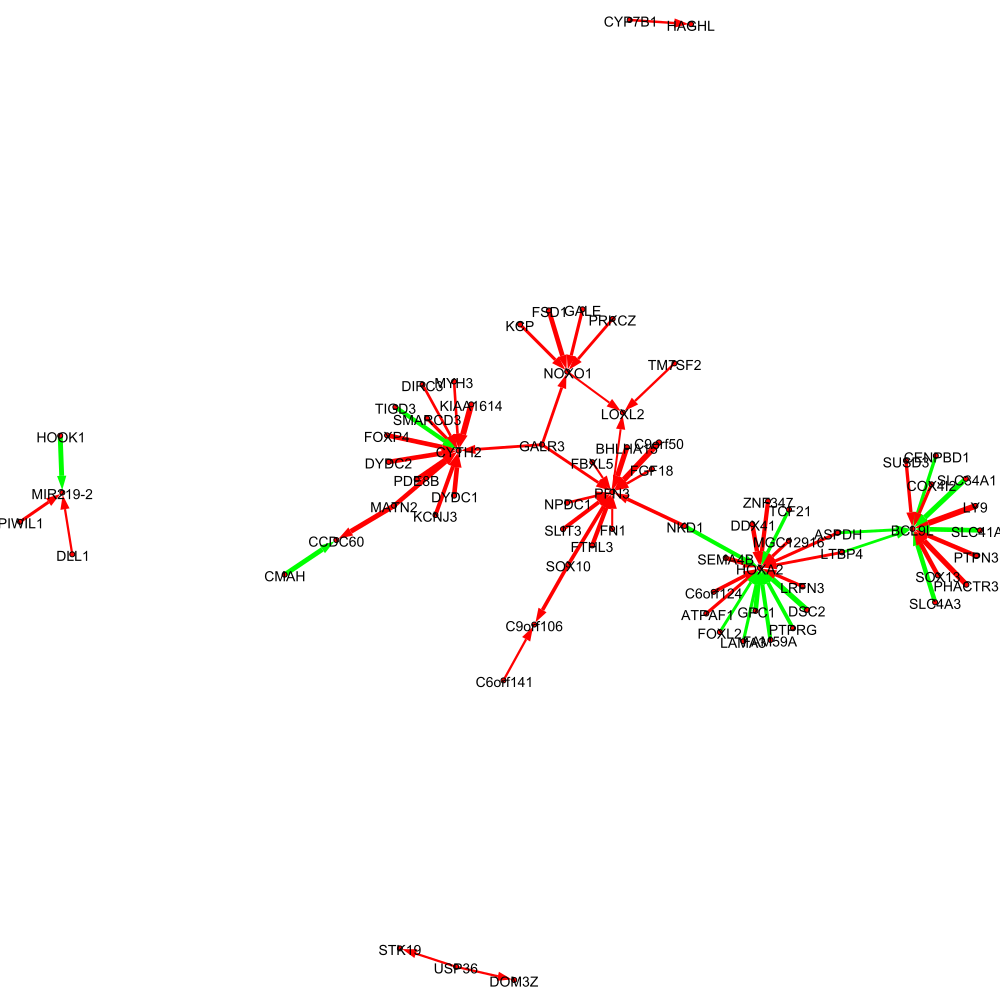

In [13]:
layout = g_corr.layout("kk")
#g_corr.es["label"] = map(lambda x: "{:0.1f}".format(x), g_corr.es["weight"])
g_corr.es["color"] = 'red'
e_positive = g_corr.es.select(weight_gt=0)
e_positive["color"] = 'green'
#layout = g_diff.layout("sphere")

visual_style = {}
visual_style["vertex_size"] = 5
#visual_style["vertex_color"] = [color_dict[gender] for gender in g.vs["gender"]]
#visual_style["vertex_label"] = g.vs["name"]
visual_style["edge_width"] = [1 + abs(weight) for weight in g_corr.es["weight"]]
visual_style["layout"] = layout
visual_style["bbox"] = (1000, 1000)
visual_style["margin"] = 20

igraph.plot(g_corr, **visual_style)

In [14]:
edges = [[8731, 7169], [8731, 5975]]
vertices = range(X.shape[1])

In [25]:
def genes_kde_plot(X, y, vertices, edges, genes_names):
    from configuration import param
    import matplotlib.pylab as pylab
    import seaborn
    seaborn.set_style('darkgrid', {'legend.frameon':True})
    fontsize = 50
    params = {'legend.fontsize': fontsize,
      'figure.figsize': (20, 15),
     'axes.labelsize': fontsize,
     'axes.titlesize':fontsize,
     'xtick.labelsize':fontsize,
     'ytick.labelsize':fontsize}
    pylab.rcParams.update(params)

    config.params["id_pair"] = param(value_be = 0, value_en = len(edges) - 1, num_ticks = len(edges), name = 'id_pair', manual_ticks = True)
    y = y.flatten()
    pu = -1
    for i, e in enumerate(edges):
        config.params["id_pair"].set_tick(i)
        fig = plt.figure()
        #fig.set_visible(not fig.get_visible())
        colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
        #plt.gca().set_prop_cycle('color', [colors[0], colors[1], colors[5]])
        u = vertices[e[0]]
        v = vertices[e[1]]
        kde_mask = config.params[config.params["kde_mask"].value].value
        xu = X[:, u]
        xv = X[:, v]
        data = np.array([xu[kde_mask], xv[kde_mask]]).astype('float32')
        kde = stats.gaussian_kde(data)
        x_min = np.min(xu)
        x_max = np.max(xu)
        y_min = np.min(xv)
        y_max = np.max(xv)
        Xm, Ym = np.mgrid[x_min:x_max:500j, y_min:y_max:500j]
        positions = np.vstack([Xm.ravel(), Ym.ravel()])
        Z = np.reshape(kde(positions).T, Xm.shape) # score_samples
        im = plt.imshow(np.rot90(Z), cmap="jet", extent=[x_min, x_max, y_min, y_max], aspect='auto')
        fig.colorbar(im)
        plt.gcf().subplots_adjust(bottom=0.15, top=0.9, left=0.15, right=0.95)
        #plt.axis('equal')
        plt.xlabel(genes_names[u])
        plt.ylabel(genes_names[v])
        
        pair_genes_path = config.ofname([["kdes", genes_names[u], genes_names[v]]], ext = ".png", include_set = config.params_sets["kdes"])
        plt.savefig(pair_genes_path)
        pair_genes_path = config.ofname([["kdes", genes_names[v], genes_names[u]]], ext = ".png", include_set = config.params_sets["kdes"])
        plt.savefig(pair_genes_path)
        plt.close(fig)

genes_kde_plot(X, y, vertices, edges, genes_names)
#genes_kde_plot(X, y, np.array([id1, id2]), np.array([[0,1],[1,0]]), genes_names)


In [24]:
def genes_kde_dist_plot(X, y, vertices, edges, genes_names):
    from configuration import param
    import matplotlib.pylab as pylab
    import seaborn
    from transform_data import calc_edge_weight
    seaborn.set_style('darkgrid', {'legend.frameon':True})
    fontsize = 50
    params = {'legend.fontsize': fontsize,
      'figure.figsize': (20, 15),
     'axes.labelsize': fontsize,
     'axes.titlesize':fontsize,
     'xtick.labelsize':fontsize,
     'ytick.labelsize':fontsize}
    pylab.rcParams.update(params)
    num_points = int(1e5)

    config.params["id_pair"] = param(value_be = 0, value_en = len(edges) - 1, num_ticks = len(edges), name = 'id_pair', manual_ticks = True)
    y = y.flatten()
    pu = -1
    for i, e in enumerate(edges):
        config.params["id_pair"].set_tick(i)
        fig = plt.figure()
        #fig.set_visible(not fig.get_visible())
        colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
        #plt.gca().set_prop_cycle('color', [colors[0], colors[1], colors[5]])
        u = vertices[e[0]]
        v = vertices[e[1]]
        xu = X[:, u]
        xv = X[:, v]
        
        threshold_p = 0
        
        kde_mask = config.params[config.params["kde_mask"].value].value
        data = np.array([xu[kde_mask], xv[kde_mask]]).astype('float32')
        print u, v, genes_names[u], genes_names[v]
        kde = stats.gaussian_kde(data)
        
        points = kde.resample(num_points)
        pr = np.array(kde(points))
        pr = np.sort(pr)
        #I = (np.arange(0, num_points + 1)).astype(np.float) / num_points
        #print I[:10], I[:-10]
        #I = np.concatenate([[0], np.cumsum(p)])
        #I /= I[-1]
        
        x_min = np.min(xu)
        x_max = np.max(xu)
        y_min = np.min(xv)
        y_max = np.max(xv)
        
        Xm, Ym = np.mgrid[x_min:x_max:500j, y_min:y_max:500j]
        positions = np.vstack([Xm.ravel(), Ym.ravel()])
        
        ZI = np.zeros(Xm.shape[0] * Xm.shape[1])
        for i, pt in enumerate(positions.T):
            p = kde(np.array([pt[0], pt[1]])) # .reshape(1, -1)
            pos = np.searchsorted(pr, p)
            #ind = int(0.1 * num_points)
            #q = pr[ind]
            #ZI[i] = p < q

            #w = (I[-1] - I[pos])
            w = float(num_points - pos) / num_points
            ZI[i] = w
            if ZI[i] < threshold_p:
                ZI[i] = 0
        ZI = np.reshape(ZI, Xm.shape)
        im = plt.imshow(np.rot90(ZI), cmap="jet", extent=[x_min, x_max, y_min, y_max], aspect='auto')#, norm=matplotlib.colors.LogNorm())
        
        fig.colorbar(im)
        #plt.axis('equal')
        
        plt.xlabel(genes_names[u])
        plt.ylabel(genes_names[v])
        
        plt.gcf().subplots_adjust(bottom=0.15, top=0.9, left=0.15, right=0.95)
        #break
        #continue;
        pair_genes_path = config.ofname([["kdes_dist", genes_names[u], genes_names[v]]], ext = ".png", include_set = config.params_sets["kdes"])
        plt.savefig(pair_genes_path)
        pair_genes_path = config.ofname([["kdes_dist", genes_names[v], genes_names[u]]], ext = ".png", include_set = config.params_sets["kdes"])
        plt.savefig(pair_genes_path)
        plt.close(fig)

edges = [[135, 28],[28, 135],[135, 33]]        
edges = [[135, 33],[33, 135]]
edges = [[8731, 7169], [8731, 5975]]
vertices = range(X.shape[1])
genes_kde_dist_plot(X, y, vertices, edges, genes_names)
#genes_kde_dist_plot(X, y, vertices, e_diff, genes_names)
#genes_kde_dist_plot(X, y, [id1,id2], [[0,1],[1,0]], genes_names)

8731 7169 JSRP1 LRIT1
8731 5975 JSRP1 PGF


['PGF'] (array([5975], dtype=int64),) (71L, 15022L)


In [30]:
config.params["thr_p"].set_tick(8)
for id_sample in config.params["id_sample"]:
    #print id_sample, '/', config.params["id_sample"].num_ticks
    print config.ofname(["graphs", "g"], ext = ".npz", include_set = config.params_sets["graph"])
    data = np.load(config.ofname(["graphs", "g"], ext = ".npz", include_set = config.params_sets["graph"]))
    g = data['G']
    g = np.unpackbits(g, axis = 1)[:, :config.params["num_genes"].value].astype(np.bool)
    if not g[2514,11511]:
        print id_sample
    

F:\PC\UNN\Scientific\Gerontology\data\GSE52588\params\num_genes_15024\kde_mask_mothers_mask\graphs\graph_thr_p_0.9_id_sample_0.npz
F:\PC\UNN\Scientific\Gerontology\data\GSE52588\params\num_genes_15024\kde_mask_mothers_mask\graphs\graph_thr_p_0.9_id_sample_1.npz
F:\PC\UNN\Scientific\Gerontology\data\GSE52588\params\num_genes_15024\kde_mask_mothers_mask\graphs\graph_thr_p_0.9_id_sample_2.npz
F:\PC\UNN\Scientific\Gerontology\data\GSE52588\params\num_genes_15024\kde_mask_mothers_mask\graphs\graph_thr_p_0.9_id_sample_3.npz
F:\PC\UNN\Scientific\Gerontology\data\GSE52588\params\num_genes_15024\kde_mask_mothers_mask\graphs\graph_thr_p_0.9_id_sample_4.npz
F:\PC\UNN\Scientific\Gerontology\data\GSE52588\params\num_genes_15024\kde_mask_mothers_mask\graphs\graph_thr_p_0.9_id_sample_5.npz
F:\PC\UNN\Scientific\Gerontology\data\GSE52588\params\num_genes_15024\kde_mask_mothers_mask\graphs\graph_thr_p_0.9_id_sample_6.npz
F:\PC\UNN\Scientific\Gerontology\data\GSE52588\params\num_genes_15024\kde_mask_moth

KeyboardInterrupt: 

In [35]:
np.arange(0, 10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [42]:
genes_chromosome = np.genfromtxt(config.ifname("gene_chromosome"), dtype='str', usecols = [0, 1])
print genes_chromosome.shape

genes_to_chromosome = dict()
for i in range(genes_chromosome.shape[0]):
    genes_to_chromosome[genes_chromosome[i][0]] = int(genes_chromosome[i][1])

(20269L, 2L)


In [44]:
print len(genes_to_chromosome)

20269


In [69]:
e_diff_chr = np.array(e_diff)
vertices_chr = np.array(vertices)
for i in range(len(vertices)):
    vertices_chr[i] = genes_to_chromosome[genes_names[vertices[i]]]

for i in range(len(e_diff)):
    x = e_diff[i][0]
    y = e_diff[i][1]
    e_diff_chr[i][0] = vertices_chr[x]
    e_diff_chr[i][1] = vertices_chr[y]

print len(vertices_chr), e_diff_chr.shape[0]
g_diff_chr = igraph.Graph(edges=e_diff_chr.tolist(), directed=False)
print g_diff_chr.vcount(), g_diff_chr.ecount()

114 112
23 112


In [84]:
#print np.unique(e_diff_chr, 1)
a = np.array([[1, 0, 0], [1, 0, 0], [2, 3, 4]])
np.unique(a, axis=0)

TypeError: unique() got an unexpected keyword argument 'axis'

In [72]:
for vertex in g_diff_chr.vs:
    vertex["label"] = str(vertex.index)
    print vertex["label"]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22


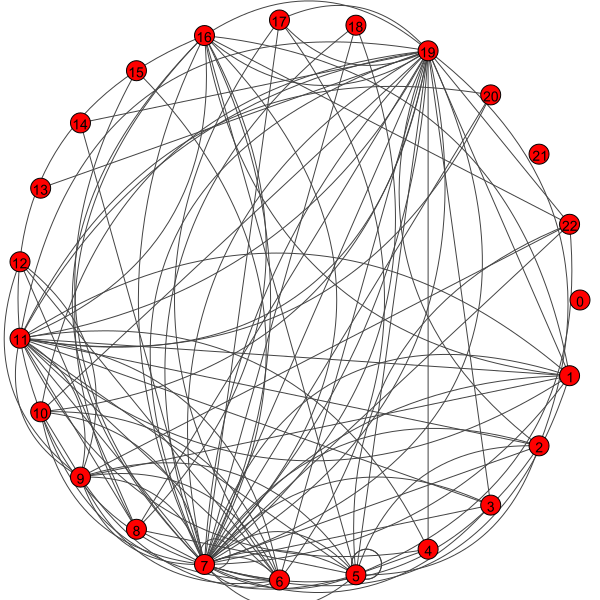

In [74]:
layout = g_diff_chr.layout("circle")
visual_style = {}
visual_style["vertex_label_dist"] = 0
visual_style["vertex_shape"] = "circle"
#visual_style["edge_color"] = g.es["color"]
# visual_style["bbox"] = (4000, 2500)
visual_style["vertex_size"] = 50
visual_style["layout"] = layout
visual_style["bbox"] = (1024, 768)
visual_style["margin"] = 40

igraph.plot(g_diff_chr, layout=layout)

In [24]:
print vertices

[   17    41    94   153   173   266   322   455   464   490   501   521
   650   677   712   759  1028  1069  1360  1408  1602  1705  1724  1740
  1814  1829  1876  1960  2013  2123  2298  2363  2484  2514  2664  2780
  2834  2905  2941  2977  3108  3188  3316  3407  3513  3545  3551  3628
  3771  3822  3830  3981  4136  4183  4197  4299  4352  4429  4516  4581
  4704  4744  4827  4835  4845  4911  4954  5079  5145  5172  5199  5213
  5224  5236  5277  5282  5292  5383  5606  5747  5804  5909  5911  5938
  5974  6117  6441  6488  6869  6877  6895  6913  7026  7036  7065  7092
  7124  7146  7293  7376  7460  7481  7522  7538  7752  7768  7927  8112
  8181  8552  8659  8660  8917  9014  9095  9294  9319  9487  9570  9710
  9758  9885  9964 10065 10157 10167 10357 10402 10514 10764 10815 11088
 11217 11233 11309 11511 11537 11590 11692 11713 11718 11749 11911 11913
 11997 12053 12084 12131 12163 12317 12405 12444 12508 12582 12613 12753
 12765 12823 13119 13162 13256 13744 13810 13855 13

In [75]:
degrees = g_diff_chr.degree()
for i in range(1,23):
    print i, degrees[i]

1 19
2 24
3 3
4 2
5 10
6 17
7 7
8 18
9 17
10 8
11 5
12 3
13 14
14 29
15 12
16 58
17 3
18 0
19 13
20 3
21 4
22 1


In [47]:
ids = np.nonzero(e_diff_chr[:,0] == e_diff_chr[:,1])

print e_diff_chr[ids,0]

[[14  2  2]]


In [73]:
help(igraph.plot)

Help on function plot in module igraph.drawing:

plot(obj, target=None, bbox=(0, 0, 600, 600), *args, **kwds)
    Plots the given object to the given target.
    
    Positional and keyword arguments not explicitly mentioned here will be
    passed down to the C{__plot__} method of the object being plotted.
    Since you are most likely interested in the keyword arguments available
    for graph plots, see L{Graph.__plot__} as well.
    
    @param obj: the object to be plotted
    @param target: the target where the object should be plotted. It can be one
      of the following types:
    
        - C{None} -- an appropriate surface will be created and the object will
          be plotted there.
    
        - C{cairo.Surface} -- the given Cairo surface will be used. This can
          refer to a PNG image, an arbitrary window, an SVG file, anything that
          Cairo can handle.
    
        - C{string} -- a file with the given name will be created and an
          appropriate Cair

# Top threshold graph

In [23]:
id1 = np.flatnonzero(genes_names == 'IFT140')[0]
print genes_names[id1] 
id2 = np.flatnonzero(genes_names == 'BCL9L')[0]
print genes_names[id2]

IFT140
BCL9L
10 29


In [26]:
m_diff = np.logical_and(m_mongoloids_and, np.logical_not(m_siblings_or))
m_sum = m_diff.sum(axis = 0, dtype=np.uint8)
e_thr = np.transpose(np.nonzero(m_sum))
m_sum.shape, m_sum.dtype
print e_thr.shape

e_thr, weights_corr = get_correlated_edges(X, y, e_thr)
print e_thr.shape

num_edges = e_thr.shape[0]
e_thr_mask = np.zeros((num_edges, config.params["thr_p"].num_ticks), np.bool)
e_thr_mask_sum = np.zeros((num_edges, 1), np.int32)

for i in range(num_edges):
    u, v = e_thr[i]
    e_thr_mask[i] = m_diff[:, u, v]
    e_thr_mask_sum[i] = m_sum[u, v]
    
ids = np.argsort(e_thr_mask_sum.flatten())
ids = np.flip(ids)

e_thr_mask = e_thr_mask[ids]
e_thr_mask_sum = e_thr_mask_sum[ids]
e_thr = e_thr[ids]
print e_thr.shape

(15136L, 2L)
(8284L, 2L)
(8284L, 2L)


In [12]:
print np.flatnonzero(genes_names == 'HOXA2')
print e_thr.shape
np.flatnonzero(e_thr[:, 0] == 11309)

[11309]
(134L, 2L)


array([], dtype=int64)

In [27]:
ntop = (e_thr_mask_sum > 0).sum()
print ntop
#print e_thr[:ntop]
#print e_thr_mask_sum[:ntop]
#print e_thr_mask[:ntop]

data_type = [('genes_names_u', 'S32'), ('genes_names_v', 'S32')]
for id_thr, thr_p in enumerate(config.params["thr_p"]):
    data_type.append((str(thr_p), np.uint8))
data_type.append(('mask_sum', np.uint8))    
T = np.zeros(ntop, dtype = data_type)
T['genes_names_u'] = genes_names[e_thr[:ntop, 0]].flatten()
T['genes_names_v'] = genes_names[e_thr[:ntop, 1]].flatten()
for id_thr, thr_p in enumerate(config.params["thr_p"]):
    T[str(thr_p)] = e_thr_mask[:ntop, id_thr].flatten()
T['mask_sum'] = e_thr_mask_sum[:ntop].flatten()

fmt = ('%s','%s','%d','%d','%d','%d','%d','%d','%d','%d','%d', '%d')
print len(T), len(fmt)

top_graph_edges_path = config.ofname([['top_thr_corr_graph'], ['top_edges']], ext = ".csv", include_set = config.params_sets["diff_graph"])
np.savetxt(top_graph_edges_path, T, delimiter=';', fmt=fmt, header = ";".join(list(T.dtype.names)), comments = '')


edges_thr = e_thr[:ntop]
genes_top = np.sort(np.unique(e_thr[:ntop].reshape(ntop * 2)))
genes_top_names = genes_names[genes_top]

for i in range(len(edges_thr)):
    u, v = edges_thr[i]
    u = np.flatnonzero(genes_top == u)[0]
    v = np.flatnonzero(genes_top == v)[0]
    edges_thr[i, 0] = u
    edges_thr[i, 1] = v

print len(genes_top)

#genes_degrees = 
g_top = igraph.Graph(vertex_attrs={"label":genes_top_names}, edges=edges_thr.tolist(), directed=False)

top_graph_genes_path = config.ofname([['top_thr_corr_graph'], ['top_graph_genes']], ext = ".txt", include_set = config.params_sets["diff_graph"])
save_graph_vertices(g_top, top_graph_genes_path)

#genes_degrees = np.array(g_top.degree())
#np.savetxt('top_genes.txt', zip(genes_top_names, genes_degrees), fmt='%s')


diff_small_graph_path = config.ofname([['top_thr_corr_graph'], ["top_graph_corr"]], ext = ".npz", include_set = config.params_sets["diff_graph"])
save_graph(diff_small_graph_path, g_top)

4373
4373 12
2153


In [105]:
diff_small_graph_path = config.ofname([['top_thr_corr_graph'], ["top_graph_corr"]], ext = ".npz", include_set = config.params_sets["diff_graph"])
g_top = load_graph(diff_small_graph_path)
#print g_top.vs["label"]
import pandas as pd
df = pd.DataFrame()
ntop = g_top.vcount()
d = g_top.degree()
ids = np.argsort(d)[::-1].astype('int').tolist()
#print ids
for v in g_top.vs[ids]:
    vn = g_top.neighbors(v)
    curn = g_top.vs[vn]["label"]
    curn = curn + [""] * (ntop - len(curn))
    df[v["label"]] = curn
top_graph_neighbors_path = config.ofname([['top_thr_corr_graph'], ["top_graph_neighbors"]], ext = ".tsv", include_set = config.params_sets["diff_graph"])
df.to_csv(top_graph_neighbors_path, sep='\t')

In [100]:
print df

     LOC100302652         HOXA2      GPR75        CCDC60      BCL9L  \
0           KIF22         KIF22      KIF22         SRP68     RAB3IP   
1           TCF15         TCF15      TCF15         UNC5A      PTPN3   
2           SRP68         SRP68      SRP68         APBB3     FTSJD1   
3         SYNGAP1       SYNGAP1       CDR2          CMAH     CELSR1   
4           UNC5A         UNC5A    SYNGAP1     LOC153328     LRRC8A   
5         ZMYND15       ZMYND15    ZMYND15      C10orf32     NUP210   
6          SH3RF1         APBB3     SH3RF1         ESRRB   HS3ST3A1   
7       C20orf201          CMAH  C20orf201         TOR2A      CRYGN   
8           APBB3         WDR67      APBB3        RAB3IP      DIP2C   
9           KCNQ1         KIF19      KCNQ1         RAB5A     VANGL1   
10           CMAH      PPARGC1B       CMAH         PTPN3      AP3B2   
11          MCFD2          DLL1      MCFD2       FAM109B  LOC286002   
12         ZNF615     LOC153328     ZNF615        LRRC14      SOX10   
13    

In [7]:
def save_graph_vertices(g, fname):
    genes_degree = g.degree()
    v_genes_names = g.vs["label"]

    data_type = [('name', 'S32'), ('degree', 'int32')]
    T = np.zeros(len(v_genes_names), dtype = data_type)
    T['name'] = v_genes_names
    T['degree'] = genes_degree

    np.savetxt(fname, T, fmt=('%s', '%d'))
#save_graph_vertices(g_diff, 'diff_graph_genes.txt')

In [3]:
m_mongoloids_and = np.ones((config.params["thr_p"].num_ticks, 15024, 15024), np.bool)
m_siblings_or = np.zeros((config.params["thr_p"].num_ticks, 15024, 15024), np.bool)
for id_thr, thr_p in enumerate(config.params["thr_p"]):
    for id_sample in config.params["id_sample"]:
        print id_sample, '/', config.params["id_sample"].num_ticks
        #print config.ofname(["graphs", "g"], ext = ".npz", include_set = config.params_sets["graph"])
        data = np.load(config.ofname(["graphs", "g"], ext = ".npz", include_set = config.params_sets["graph"]))
        g = data['G']
        g = np.unpackbits(g, axis = 1)[:, :config.params["num_genes"].value].astype(np.bool)
        if id_sample in config.params["mongoloids_mask"].value:
            m_mongoloids_and[id_thr] = np.logical_and(g, m_mongoloids_and[id_thr])

        if id_sample in config.params["siblings_mask"].value:
            m_siblings_or[id_thr] = np.logical_or(g, m_siblings_or[id_thr])


0 / 87
1 / 87
2 / 87
3 / 87
4 / 87
5 / 87
6 / 87
7 / 87
8 / 87
9 / 87
10 / 87
11 / 87
12 / 87
13 / 87
14 / 87
15 / 87
16 / 87
17 / 87
18 / 87
19 / 87
20 / 87
21 / 87
22 / 87
23 / 87
24 / 87
25 / 87
26 / 87
27 / 87
28 / 87
29 / 87
30 / 87
31 / 87
32 / 87
33 / 87
34 / 87
35 / 87
36 / 87
37 / 87
38 / 87
39 / 87
40 / 87
41 / 87
42 / 87
43 / 87
44 / 87
45 / 87
46 / 87
47 / 87
48 / 87
49 / 87
50 / 87
51 / 87
52 / 87
53 / 87
54 / 87
55 / 87
56 / 87
57 / 87
58 / 87
59 / 87
60 / 87
61 / 87
62 / 87
63 / 87
64 / 87
65 / 87
66 / 87
67 / 87
68 / 87
69 / 87
70 / 87
71 / 87
72 / 87
73 / 87
74 / 87
75 / 87
76 / 87
77 / 87
78 / 87
79 / 87
80 / 87
81 / 87
82 / 87
83 / 87
84 / 87
85 / 87
86 / 87
0 / 87
1 / 87
2 / 87
3 / 87
4 / 87
5 / 87
6 / 87
7 / 87
8 / 87
9 / 87
10 / 87
11 / 87
12 / 87
13 / 87
14 / 87
15 / 87
16 / 87
17 / 87
18 / 87
19 / 87
20 / 87
21 / 87
22 / 87
23 / 87
24 / 87
25 / 87
26 / 87
27 / 87
28 / 87
29 / 87
30 / 87
31 / 87
32 / 87
33 / 87
34 / 87
35 / 87
36 / 87
37 / 87
38 / 87
39 / 87
40 /

In [32]:
m_mongoloids_and[-2].sum()

4172960

In [184]:
cur = np.array([[1,4],[2,3],[4,6]])
print cur.reshape(6)


[1 4 2 3 4 6]


In [44]:
a = np.array([True, True, True, False, False, True])
print a.sum()

4


In [45]:
print k

0


In [46]:
print e_thr.shape

(0L, 2L)


In [257]:
#m = m_mongoloids_and
m = m_diff
for id_thr, thr_p in enumerate(config.params["thr_p"]):
    edges = np.transpose(np.nonzero(m[id_thr]))
    y = np.bincount(np.resize(edges, 2 * edges.shape[0]))
    v = np.nonzero(y)[0]
    print 1-thr_p, '&', len(v), '&', len(edges), '\\\\'

0.9 & 5385 & 9936 \\
0.8 & 4031 & 7561 \\
0.7 & 985 & 1204 \\
0.6 & 113 & 112 \\
0.5 & 12 & 9 \\
0.4 & 0 & 0 \\
0.3 & 0 & 0 \\
0.2 & 0 & 0 \\
0.1 & 0 & 0 \\


# Граф с количеством пациентов обладающих данным ребром

In [46]:
m_mongoloids_sum = np.zeros((15024, 15024), np.uint8)
m_siblings_sum = np.zeros((15024, 15024), np.uint8)
for id_thr, thr_p in enumerate(config.params["thr_p"]):
    if id_thr != 3:
        continue
    for id_sample in config.params["id_sample"]:
        print id_sample, '/', config.params["id_sample"].num_ticks
        #print config.ofname(["graphs", "g"], ext = ".npz", include_set = config.params_sets["graph"])
        data = np.load(config.ofname(["graphs", "g"], ext = ".npz", include_set = config.params_sets["graph"]))
        g = data['G']
        g = np.unpackbits(g, axis = 1)[:, :config.params["num_genes"].value].astype(np.bool)
        #print id_thr, id_sample, y[id_sample], g[id1, id2]
        #continue
        if id_sample in config.params["mongoloids_mask"].value:
            m_mongoloids_sum = m_mongoloids_sum + g
        if id_sample in config.params["siblings_mask"].value:
            m_siblings_sum = m_siblings_sum + g
        


0 / 87
1 / 87
2 / 87
3 / 87
4 / 87
5 / 87
6 / 87
7 / 87
8 / 87
9 / 87
10 / 87
11 / 87
12 / 87
13 / 87
14 / 87
15 / 87
16 / 87
17 / 87
18 / 87
19 / 87
20 / 87
21 / 87
22 / 87
23 / 87
24 / 87
25 / 87
26 / 87
27 / 87
28 / 87
29 / 87
30 / 87
31 / 87
32 / 87
33 / 87
34 / 87
35 / 87
36 / 87
37 / 87
38 / 87
39 / 87
40 / 87
41 / 87
42 / 87
43 / 87
44 / 87
45 / 87
46 / 87
47 / 87
48 / 87
49 / 87
50 / 87
51 / 87
52 / 87
53 / 87
54 / 87
55 / 87
56 / 87
57 / 87
58 / 87
59 / 87
60 / 87
61 / 87
62 / 87
63 / 87
64 / 87
65 / 87
66 / 87
67 / 87
68 / 87
69 / 87
70 / 87
71 / 87
72 / 87
73 / 87
74 / 87
75 / 87
76 / 87
77 / 87
78 / 87
79 / 87
80 / 87
81 / 87
82 / 87
83 / 87
84 / 87
85 / 87
86 / 87


In [293]:
edges = np.transpose(np.nonzero(m_diff[3]))
y = np.bincount(np.resize(edges, 2 * edges.shape[0]))
vertices = np.nonzero(y)[0]
m_diff_2 = np.logical_and(m_mongoloids_sum > 0, np.logical_not(m_siblings_or[3]))
edges = np.transpose(np.nonzero(m_diff_2[np.ix_(vertices, vertices)]))
print len(edges), len(vertices)
weights_edges = m_mongoloids_sum[edges[0], edges[1]]

g_small = igraph.Graph(vertex_attrs={"label":genes_names[vertices]}, edges=edges.tolist(), directed=False)
v_empty = np.flatnonzero((np.array(g_small.degree()) == 0).flatten()).tolist()
g_small.delete_vertices(list(v_empty))
g_small.es["weight"] = weights_edges

1653 113


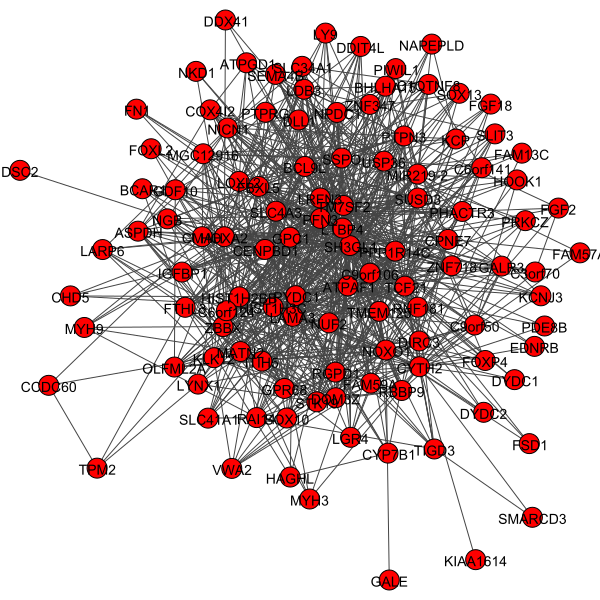

In [291]:
layout = g_small.layout("kk")
igraph.plot(g_small, layout = layout)

In [277]:
res = 0
for i in range(m_mongoloids_sum.shape[0]):
    res += m_mongoloids_sum[i, i]
    
print res    

15024


In [ ]:
print m_siblings_sum[id1, id2], m_mongoloids_sum[id1, id2]

In [125]:
import timeit
from annotations.cpgs import cpgs_annotation
#cpgs = cpgs_annotation(config.ifname('cpgs'))
#cur = cpgs.get_sub_frame({'chr_in': ['22'], 'geotype_ex': ['Island']})
df = cpgs.get_cpgs({'geotype_ex': [np.NaN]}) # genes_names
#print timeit.timeit("df = cpgs.get_sub_frame({'cpg_in': genes_names})", setup = "from __main__ import cpgs, genes_names; import numpy as np", number =1)
#print cur.index.values

print len(df)
#print cur, ids, len(cur)

set(['N_Shore']) set([nan])
nan set([nan])


TypeError: object of type 'float' has no len()